## 1. Tìm hiểu dữ liệu

In [ ]:
from google.colab import drive #import thư mục trong Google Drive vào Colab
drive.mount('/content/drive') #mount vào thư mục content

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import scipy.stats as st
from sklearn.cluster import KMeans, DBSCAN
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from itertools import combinations as comb
from sklearn.utils import resample
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder, MinMaxScaler
from sklearn.impute import KNNImputer, SimpleImputer
from sklearn.feature_selection import mutual_info_classif
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, roc_auc_score, accuracy_score, f1_score, recall_score, precision_score, classification_report

In [ ]:
# read training and test data
df = pd.read_csv("/content/drive/MyDrive/Khai Pha Du Lieu/credit-score-train.csv", low_memory=False)

In [ ]:
# print training data
df

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0x25fe9,CUS_0x942c,April,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,_,502.38,34.663572,31 Years and 6 Months,No,35.104023,60.97133255718485,High_spent_Large_value_payments,479.86622816574095,Poor
99996,0x25fea,CUS_0x942c,May,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,_,502.38,40.565631,31 Years and 7 Months,No,35.104023,54.18595028760385,High_spent_Medium_value_payments,496.651610435322,Poor
99997,0x25feb,CUS_0x942c,June,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,Good,502.38,41.255522,31 Years and 8 Months,No,35.104023,24.02847744864441,High_spent_Large_value_payments,516.8090832742814,Poor
99998,0x25fec,CUS_0x942c,July,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,Good,502.38,33.638208,31 Years and 9 Months,No,35.104023,251.67258219721603,Low_spent_Large_value_payments,319.1649785257098,Standard


In [ ]:
# Mô tả data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Monthly_Inhand_Salary,84998.0,4194.170850,3183.686167,303.645417,1625.568229,3093.745000,5957.448333,15204.633333
Num_Bank_Accounts,100000.0,17.091280,117.404834,-1.000000,3.000000,6.000000,7.000000,1798.000000
Num_Credit_Card,100000.0,22.474430,129.057410,0.000000,4.000000,5.000000,7.000000,1499.000000
Interest_Rate,100000.0,72.466040,466.422621,1.000000,8.000000,13.000000,20.000000,5797.000000
Delay_from_due_date,100000.0,21.068780,14.860104,-5.000000,10.000000,18.000000,28.000000,67.000000
Num_Credit_Inquiries,98035.0,27.754251,193.177339,0.000000,3.000000,6.000000,9.000000,2597.000000
Credit_Utilization_Ratio,100000.0,32.285173,5.116875,20.000000,28.052567,32.305784,36.496663,50.000000
Total_EMI_per_month,100000.0,1403.118217,8306.041270,0.000000,30.306660,69.249473,161.224249,82331.000000


In [ ]:
# 
df.select_dtypes('object').describe().T

,count,unique,top,freq
ID,100000,100000,0x1602,1
Customer_ID,100000,12500,CUS_0xd40,8
Month,100000,8,January,12500
Name,90015,10139,Langep,44
Age,100000,1788,38,2833
SSN,100000,12501,#F%$D@*&8,5572
Occupation,100000,16,_______,7062
Annual_Income,100000,18940,36585.12,16
Num_of_Loan,100000,434,3,14386
Type_of_Loan,88592,6260,Not Specified,1408


In [ ]:
df_cp = df

In [ ]:
# Bỏ cột nằm ngoài phạm vi mô hình
delete_col = ['ID','Customer_ID','Month','Name','SSN','Monthly_Inhand_Salary','Num_Bank_Accounts','Num_Credit_Card',
         'Interest_Rate','Num_of_Loan','Type_of_Loan','Changed_Credit_Limit','Num_Credit_Inquiries','Credit_Mix',
         'Credit_Utilization_Ratio','Amount_invested_monthly']
df_cp = df_cp.drop(delete_col , axis=1).copy()
df_cp.shape

(100000, 12)

## 2. Thay thế các giá trị không hợp lệ

In [ ]:
# Kiểm tra các giá trị dữ liệu còn thiếu (null)
df_cp.isnull().sum()

Age                          0
Occupation                   0
Annual_Income                0
Delay_from_due_date          0
Num_of_Delayed_Payment    7002
Outstanding_Debt             0
Credit_History_Age        9030
Payment_of_Min_Amount        0
Total_EMI_per_month          0
Payment_Behaviour            0
Monthly_Balance           1200
Credit_Score                 0
dtype: int64

In [ ]:
# Loại bỏ các dòng chứa giá trị null
df_cp.dropna(axis = 0, inplace=True)
df_cp.isnull().sum()
df_cp.shape

(83630, 12)

## 3. Chuyển đổi sữa liệu lỗi

In [ ]:
# Kiểm tra duy nhất để tìm giá trị bị thiếu hoặc dữ liệu không chính xác
for i in df_cp:
  print('\n',i,df_cp[i].unique()) # unique() trả về danh sách các giá trị duy nhất của cột đó


 Age ['23' '-500' '28_' ... '4808_' '2263' '1342']

 Occupation ['Scientist' '_______' 'Teacher' 'Engineer' 'Entrepreneur' 'Developer'
 'Lawyer' 'Media_Manager' 'Doctor' 'Journalist' 'Manager' 'Accountant'
 'Musician' 'Mechanic' 'Writer' 'Architect']

 Annual_Income ['19114.12' '34847.84' '34847.84_' ... '20002.88' '39628.99' '39628.99_']

 Delay_from_due_date [ 3  5  8  7 13 10  0  4  1  9 11 -1 30 31 34 27 14  2 -2 16 17 15 23 22
 12 18 19 51 53 26 48 43 52 28 25 20 49 61 29 50 58 45  6 55 56 59 57 54
 62 67 36 41 21 24 65 33 32 39 47 46 60 64 35 44 38 -3 63 42 40 37 -5 -4
 66]

 Num_of_Delayed_Payment ['7' '4' '8_' '1' '-1' '3_' '0' '8' '6' '5' '3' '9' '12' '15' '17' '2'
 '2_' '14' '11' '20' '22' '10' '13' '13_' '14_' '16' '12_' '18' '19' '23'
 '24' '21' '3318' '3083' '22_' '1338' '4_' '26' '11_' '3104' '25' '10_'
 '183_' '9_' '1106' '834' '19_' '24_' '23_' '2672' '20_' '2008' '-3' '538'
 '6_' '1_' '16_' '27' '-2' '3478' '2420' '15_' '707' '26_' '18_' '28'
 '17_' '5_' '1867' '2250'

In [ ]:
# df_cp = df_cp.replace('_', np.nan) # Thay thế giá trị '_' thành giá trị NaN
# df_cp = df_cp.replace('!@9#%8', np.nan) # Thay thế giá trị '!@9#%8' thành giá trị NaN (thường xảy ra ở cột Payment_Behaviour)
# df_cp = df_cp.replace('_______', np.nan) # Thay thế giá trị '_______' thành giá trị NaN (thường xảy ra ở cột Occupation)

# Loại bỏ các ký tự đặc biệt
# lambda sẽ kiểm tra xem 1 giá trị bất kỳ trong df có phải là NaN hoặc không phải là chuỗi hay không
# Nếu không phải chuỗi, phần tử đó sẽ được giữ nguyên giá trị
# Nếu là chuỗi, hàm lambda sẽ loại bỏ các ký tự _ ," đầu và cuối chuỗi, 
# sau đó thay thế các giá trị chuỗi đã xác định trước (như '', '_ ', '-', ...) bằng giá trị NaN.
df_cp = df_cp.applymap(lambda x: x if x is np.NaN or not isinstance(x, str) else 
                 str(x).strip('_ ,"')).replace(['',
                                                '_',
                                                '-', 
                                                '-333333333333333333333333333'
                                                ,'nan', 
                                                '__10000__',
                                                '!@9#%8', 
                                                '#F%$D@*&8'], np.NaN)

df_cp = df_cp.dropna() # Xóa các hàng chứa giá trị NaN
df_cp.shape

(71836, 12)

In [ ]:
# Chuyển đổi kiểu dữ liệu của một số cột
df_cp['Monthly_Balance'] = df_cp.Monthly_Balance.astype(float)

df_cp['Total_EMI_per_month'] = df_cp.Total_EMI_per_month.astype(float)

df_cp['Annual_Income'] = df_cp.Annual_Income.astype(float)

df_cp['Outstanding_Debt'] = df_cp.Outstanding_Debt.astype(float)

df_cp['Age'] = df_cp.Age.astype(float)

df_cp['Num_of_Delayed_Payment'] =df_cp['Num_of_Delayed_Payment'].astype(float)

df_cp['Monthly_Balance'] = df_cp['Monthly_Balance'].round(decimals = 2)

df_cp['Total_EMI_per_month'] = df_cp['Total_EMI_per_month'].round(decimals = 2)

df_cp['Annual_Income'] = df_cp['Annual_Income'].round(decimals = 2)

In [ ]:
df_cp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 71836 entries, 0 to 99997
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     71836 non-null  float64
 1   Occupation              71836 non-null  object 
 2   Annual_Income           71836 non-null  float64
 3   Delay_from_due_date     71836 non-null  int64  
 4   Num_of_Delayed_Payment  71836 non-null  float64
 5   Outstanding_Debt        71836 non-null  float64
 6   Credit_History_Age      71836 non-null  object 
 7   Payment_of_Min_Amount   71836 non-null  object 
 8   Total_EMI_per_month     71836 non-null  float64
 9   Payment_Behaviour       71836 non-null  object 
 10  Monthly_Balance         71836 non-null  float64
 11  Credit_Score            71836 non-null  object 
dtypes: float64(6), int64(1), object(5)
memory usage: 7.1+ MB


In [ ]:
df_cp.describe(include=['float64', 'int64'], percentiles=[0.90, 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99])

,Age,Annual_Income,Delay_from_due_date,Num_of_Delayed_Payment,Outstanding_Debt,Total_EMI_per_month,Monthly_Balance
count,71836.000000,7.183600e+04,71836.000000,71836.000000,71836.000000,71836.000000,71836.000000
mean,110.779512,1.751292e+05,21.041734,31.192397,1422.217286,1401.105666,402.654817
std,685.364994,1.430462e+06,14.868407,228.231751,1151.142285,8279.745832,214.422317
min,-500.000000,7.005930e+03,-5.000000,-3.000000,0.230000,0.000000,0.010000
50%,33.000000,3.696676e+04,18.000000,14.000000,1163.400000,68.350000,336.420000
90%,50.000000,1.124609e+05,45.000000,21.000000,3152.240000,279.935000,707.505000
91%,51.000000,1.167941e+05,47.000000,22.000000,3351.213000,295.180000,734.200000
92%,51.000000,1.210545e+05,49.000000,22.000000,3520.790000,316.532000,762.326000
93%,52.000000,1.252650e+05,50.000000,23.000000,3682.080000,342.490000,793.767500
94%,53.000000,1.296957e+05,52.000000,23.000000,3858.980000,376.560000,825.809000


In [ ]:
# age: loại bỏ tuổi nhỏ hơn 0 và lớn hơn 120
df_cp = df_cp.drop(df_cp[(df_cp['Age'] < 0) | (df_cp['Age'] > 120)].index)


# Num_of_Delayed_Payment: số lần thanh toán bị trì hoãn, loại bỏ giá trị nằm ngoài [0:50] 
df_cp = df_cp[(df_cp['Num_of_Delayed_Payment'] >= 0) & (df_cp['Num_of_Delayed_Payment'] <= 50)]



In [ ]:

df_cp.describe(include=['float64', 'int64'], percentiles=[0.90, 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99])

,Age,Annual_Income,Delay_from_due_date,Num_of_Delayed_Payment,Outstanding_Debt,Total_EMI_per_month,Monthly_Balance
count,68772.000000,6.877200e+04,68772.000000,68772.000000,68772.000000,68772.000000,68772.000000
mean,33.310054,1.756456e+05,21.154990,13.407695,1427.837884,1399.086161,401.726138
std,10.789926,1.437173e+06,14.881361,6.198513,1153.928394,8275.713103,213.710962
min,14.000000,7.005930e+03,-5.000000,0.000000,0.230000,0.000000,0.010000
50%,33.000000,3.689849e+04,18.000000,14.000000,1167.860000,68.430000,335.895000
90%,48.000000,1.120135e+05,45.000000,21.000000,3176.770000,279.680000,704.708000
91%,49.000000,1.163967e+05,47.000000,22.000000,3373.130000,295.170000,731.524400
92%,50.000000,1.205398e+05,49.000000,22.000000,3531.620000,316.964000,758.929600
93%,51.000000,1.249009e+05,51.000000,22.000000,3695.470000,343.122100,791.180900
94%,51.000000,1.292335e+05,52.000000,23.000000,3869.967800,375.712200,823.887400


In [ ]:
df_cp

,Age,Occupation,Annual_Income,Delay_from_due_date,Num_of_Delayed_Payment,Outstanding_Debt,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Payment_Behaviour,Monthly_Balance,Credit_Score
0,23.0,Scientist,19114.12,3,7.0,809.98,22 Years and 1 Months,No,49.57,High_spent_Small_value_payments,312.49,Good
3,23.0,Scientist,19114.12,5,4.0,809.98,22 Years and 4 Months,No,49.57,Low_spent_Small_value_payments,223.45,Good
6,23.0,Scientist,19114.12,3,8.0,809.98,22 Years and 7 Months,No,49.57,Low_spent_Small_value_payments,244.57,Good
9,28.0,Teacher,34847.84,7,1.0,605.03,26 Years and 8 Months,No,18.82,High_spent_Large_value_payments,484.59,Good
11,28.0,Teacher,34847.84,3,3.0,605.03,26 Years and 10 Months,No,18.82,Low_spent_Medium_value_payments,465.68,Good
...,...,...,...,...,...,...,...,...,...,...,...,...
99991,29.0,Architect,20002.88,33,25.0,3571.70,6 Years and 3 Months,Yes,60.96,High_spent_Large_value_payments,337.36,Standard
99994,25.0,Mechanic,39628.99,20,6.0,502.38,31 Years and 5 Months,No,35.10,High_spent_Medium_value_payments,410.26,Poor
99995,25.0,Mechanic,39628.99,23,7.0,502.38,31 Years and 6 Months,No,35.10,High_spent_Large_value_payments,479.87,Poor
99996,25.0,Mechanic,39628.99,18,7.0,502.38,31 Years and 7 Months,No,35.10,High_spent_Medium_value_payments,496.65,Poor


In [ ]:
# chuyển đổi đơn vị năm tháng sang năm, ví dụ 1 năm 6 tháng thành 1,5 năm
def convert_to_years(val):
    year, month = val.split(" Years and ")
    month = month.replace(" Months", "")
    return float(year) + float(month)/12

# sử dụng hàm convert_to_years để chuyển đổi đơn vị cho cột 'Credit_History_Age'
df_cp['Credit_History_Age'] = df_cp['Credit_History_Age'].apply(convert_to_years)
df_cp

,Age,Occupation,Annual_Income,Delay_from_due_date,Num_of_Delayed_Payment,Outstanding_Debt,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Payment_Behaviour,Monthly_Balance,Credit_Score
0,23.0,Scientist,19114.12,3,7.0,809.98,22.083333,No,49.57,High_spent_Small_value_payments,312.49,Good
3,23.0,Scientist,19114.12,5,4.0,809.98,22.333333,No,49.57,Low_spent_Small_value_payments,223.45,Good
6,23.0,Scientist,19114.12,3,8.0,809.98,22.583333,No,49.57,Low_spent_Small_value_payments,244.57,Good
9,28.0,Teacher,34847.84,7,1.0,605.03,26.666667,No,18.82,High_spent_Large_value_payments,484.59,Good
11,28.0,Teacher,34847.84,3,3.0,605.03,26.833333,No,18.82,Low_spent_Medium_value_payments,465.68,Good
...,...,...,...,...,...,...,...,...,...,...,...,...
99991,29.0,Architect,20002.88,33,25.0,3571.70,6.250000,Yes,60.96,High_spent_Large_value_payments,337.36,Standard
99994,25.0,Mechanic,39628.99,20,6.0,502.38,31.416667,No,35.10,High_spent_Medium_value_payments,410.26,Poor
99995,25.0,Mechanic,39628.99,23,7.0,502.38,31.500000,No,35.10,High_spent_Large_value_payments,479.87,Poor
99996,25.0,Mechanic,39628.99,18,7.0,502.38,31.583333,No,35.10,High_spent_Medium_value_payments,496.65,Poor


In [ ]:

# Chuyển đổi thông tin thành giá trị theo cấp độ
df_cp['Payment_Behaviour'] = df_cp['Payment_Behaviour'].astype(str).str.replace('Low_spent_Small_value_payments','1')
df_cp['Payment_Behaviour'] = df_cp['Payment_Behaviour'].astype(str).str.replace('Low_spent_Medium_value_payments','2')
df_cp['Payment_Behaviour'] = df_cp['Payment_Behaviour'].astype(str).str.replace('Low_spent_Large_value_payments','3')
df_cp['Payment_Behaviour'] = df_cp['Payment_Behaviour'].astype(str).str.replace('High_spent_Small_value_payments','4')
df_cp['Payment_Behaviour'] = df_cp['Payment_Behaviour'].astype(str).str.replace('High_spent_Medium_value_payments','5')
df_cp['Payment_Behaviour'] = df_cp['Payment_Behaviour'].astype(str).str.replace('High_spent_Large_value_payments','6')
df_cp.head()

,Age,Occupation,Annual_Income,Delay_from_due_date,Num_of_Delayed_Payment,Outstanding_Debt,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Payment_Behaviour,Monthly_Balance,Credit_Score
0,23.0,Scientist,19114.12,3,7.0,809.98,22.083333,No,49.57,4,312.49,Good
3,23.0,Scientist,19114.12,5,4.0,809.98,22.333333,No,49.57,1,223.45,Good
6,23.0,Scientist,19114.12,3,8.0,809.98,22.583333,No,49.57,1,244.57,Good
9,28.0,Teacher,34847.84,7,1.0,605.03,26.666667,No,18.82,6,484.59,Good
11,28.0,Teacher,34847.84,3,3.0,605.03,26.833333,No,18.82,2,465.68,Good


In [ ]:
# Chuyển đổi dữ liệu Credit_Score & Payment_of_Min_Amount thành số
df_cp['Credit_Score'] = df_cp['Credit_Score'].str.replace('Good', '3', n=-1)
df_cp['Credit_Score'] = df_cp['Credit_Score'].str.replace('Standard', '2', n=-1)
df_cp['Credit_Score'] = df_cp['Credit_Score'].str.replace('Poor', '1', n=-1)
df_cp['Credit_Score'] = df_cp[['Credit_Score']].apply(pd.to_numeric)

df_cp['Payment_of_Min_Amount'] = df_cp['Payment_of_Min_Amount'].str.replace('NM', '0')
df_cp['Payment_of_Min_Amount'] = df_cp['Payment_of_Min_Amount'].str.replace('Yes', '1')
df_cp['Payment_of_Min_Amount'] = df_cp['Payment_of_Min_Amount'].str.replace('No', '2')
df_cp['Payment_of_Min_Amount'] = df_cp[['Payment_of_Min_Amount']].apply(pd.to_numeric)
df_cp

,Age,Occupation,Annual_Income,Delay_from_due_date,Num_of_Delayed_Payment,Outstanding_Debt,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Payment_Behaviour,Monthly_Balance,Credit_Score
0,23.0,Scientist,19114.12,3,7.0,809.98,22.083333,2,49.57,4,312.49,3
3,23.0,Scientist,19114.12,5,4.0,809.98,22.333333,2,49.57,1,223.45,3
6,23.0,Scientist,19114.12,3,8.0,809.98,22.583333,2,49.57,1,244.57,3
9,28.0,Teacher,34847.84,7,1.0,605.03,26.666667,2,18.82,6,484.59,3
11,28.0,Teacher,34847.84,3,3.0,605.03,26.833333,2,18.82,2,465.68,3
...,...,...,...,...,...,...,...,...,...,...,...,...
99991,29.0,Architect,20002.88,33,25.0,3571.70,6.250000,1,60.96,6,337.36,2
99994,25.0,Mechanic,39628.99,20,6.0,502.38,31.416667,2,35.10,5,410.26,1
99995,25.0,Mechanic,39628.99,23,7.0,502.38,31.500000,2,35.10,6,479.87,1
99996,25.0,Mechanic,39628.99,18,7.0,502.38,31.583333,2,35.10,5,496.65,1


In [ ]:
df_cp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 68772 entries, 0 to 99997
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     68772 non-null  float64
 1   Occupation              68772 non-null  object 
 2   Annual_Income           68772 non-null  float64
 3   Delay_from_due_date     68772 non-null  int64  
 4   Num_of_Delayed_Payment  68772 non-null  float64
 5   Outstanding_Debt        68772 non-null  float64
 6   Credit_History_Age      68772 non-null  float64
 7   Payment_of_Min_Amount   68772 non-null  int64  
 8   Total_EMI_per_month     68772 non-null  float64
 9   Payment_Behaviour       68772 non-null  object 
 10  Monthly_Balance         68772 non-null  float64
 11  Credit_Score            68772 non-null  int64  
dtypes: float64(7), int64(3), object(2)
memory usage: 6.8+ MB


In [ ]:
df_cp.dtypes

Age                       float64
Occupation                 object
Annual_Income             float64
Delay_from_due_date         int64
Num_of_Delayed_Payment    float64
Outstanding_Debt          float64
Credit_History_Age        float64
Payment_of_Min_Amount       int64
Total_EMI_per_month       float64
Payment_Behaviour          object
Monthly_Balance           float64
Credit_Score                int64
dtype: object

# 4. Kiểm tra dữ liệu

In [ ]:
### Cân bằng - Nghề nghiệp
occupation_count = df_cp['Occupation'].value_counts(dropna = False)
occupation_count

Lawyer           4852
Teacher          4691
Architect        4681
Engineer         4660
Mechanic         4657
Scientist        4640
Accountant       4632
Entrepreneur     4629
Media_Manager    4565
Developer        4547
Journalist       4523
Doctor           4517
Manager          4426
Musician         4412
Writer           4340
Name: Occupation, dtype: int64

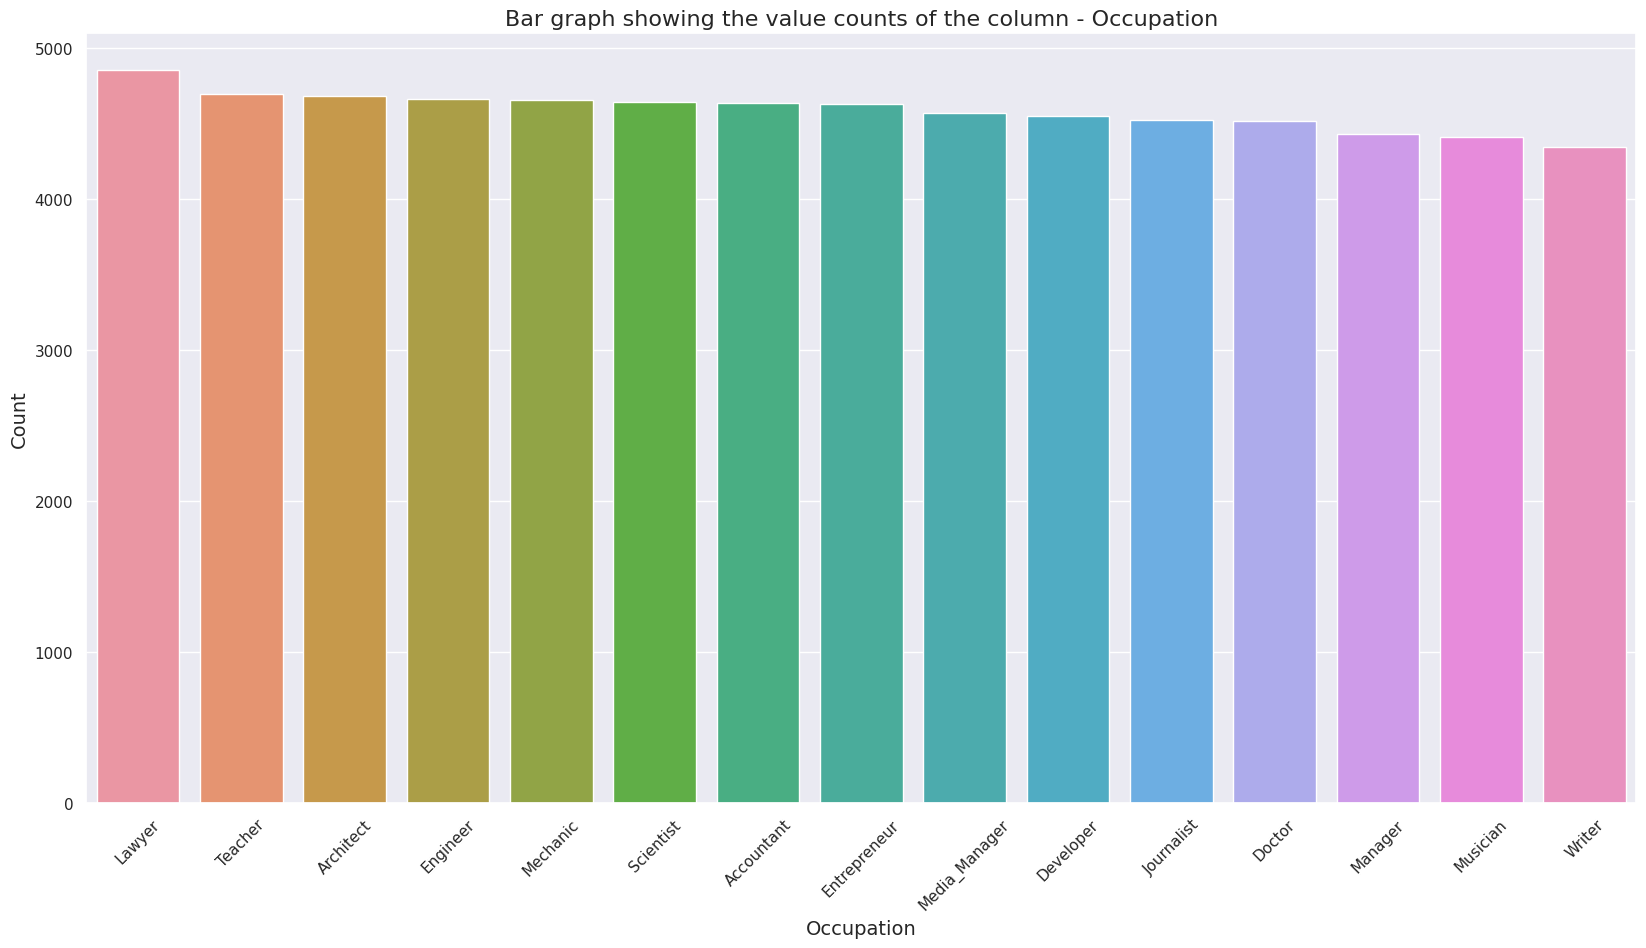

In [ ]:
sns.set(rc={'figure.figsize': (20, 10)})
sns.barplot(x=occupation_count.index, y=occupation_count.values)
plt.title('Bar graph showing the value counts of the column - Occupation', fontsize=16)
plt.ylabel('Count', fontsize=14)
plt.xlabel('Occupation', fontsize=14)
plt.xticks(rotation=45)
plt.show()

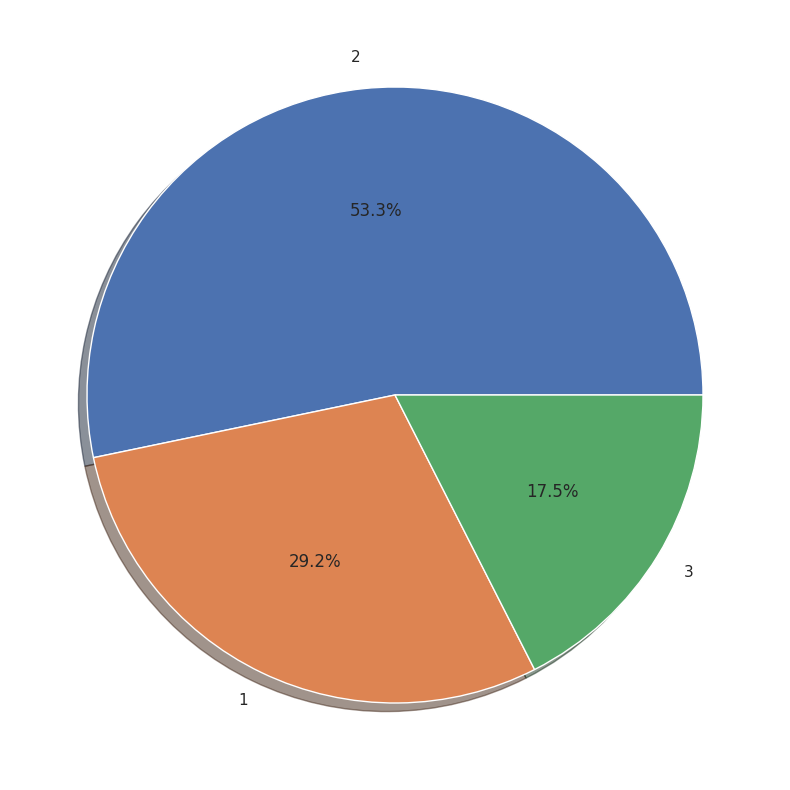

In [ ]:
# Biểu đồ tròn (pie chart) trực quan hóa tỷ lệ phân bổ của các giá trị trong cột "Credit_Score" 
label = df_cp.Credit_Score.value_counts().index   # giá trị duy nhất
label_count = df_cp.Credit_Score.value_counts().values  # số lần xuất hiện
plt.pie(data=df_cp, x=label_count, labels=label, autopct='%1.1f%%', shadow=True, radius=1)
plt.show()


,Age,Annual_Income,Delay_from_due_date,Num_of_Delayed_Payment,Outstanding_Debt,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Monthly_Balance,Credit_Score
Age,1.000000,0.005077,-0.173517,-0.181315,-0.202017,0.233633,0.184636,0.001772,0.115162,0.160327
Annual_Income,0.005077,1.000000,-0.009698,-0.007886,-0.001334,-0.001629,0.011639,-0.004030,0.017619,0.005887
Delay_from_due_date,-0.173517,-0.009698,1.000000,0.538789,0.571111,-0.487525,-0.336706,-0.006310,-0.277210,-0.429944
Num_of_Delayed_Payment,-0.181315,-0.007886,0.538789,1.000000,0.502589,-0.478580,-0.392212,-0.006717,-0.299406,-0.367346
Outstanding_Debt,-0.202017,-0.001334,0.571111,0.502589,1.000000,-0.627874,-0.326996,-0.007900,-0.315758,-0.383224
Credit_History_Age,0.233633,-0.001629,-0.487525,-0.478580,-0.627874,1.000000,0.386306,0.007165,0.322418,0.385345
Payment_of_Min_Amount,0.184636,0.011639,-0.336706,-0.392212,-0.326996,0.386306,1.000000,-0.000448,0.219224,0.287884
Total_EMI_per_month,0.001772,-0.004030,-0.006310,-0.006717,-0.007900,0.007165,-0.000448,1.000000,0.002769,0.005840
Monthly_Balance,0.115162,0.017619,-0.277210,-0.299406,-0.315758,0.322418,0.219224,0.002769,1.000000,0.201248
Credit_Score,0.160327,0.005887,-0.429944,-0.367346,-0.383224,0.385345,0.287884,0.005840,0.201248,1.000000


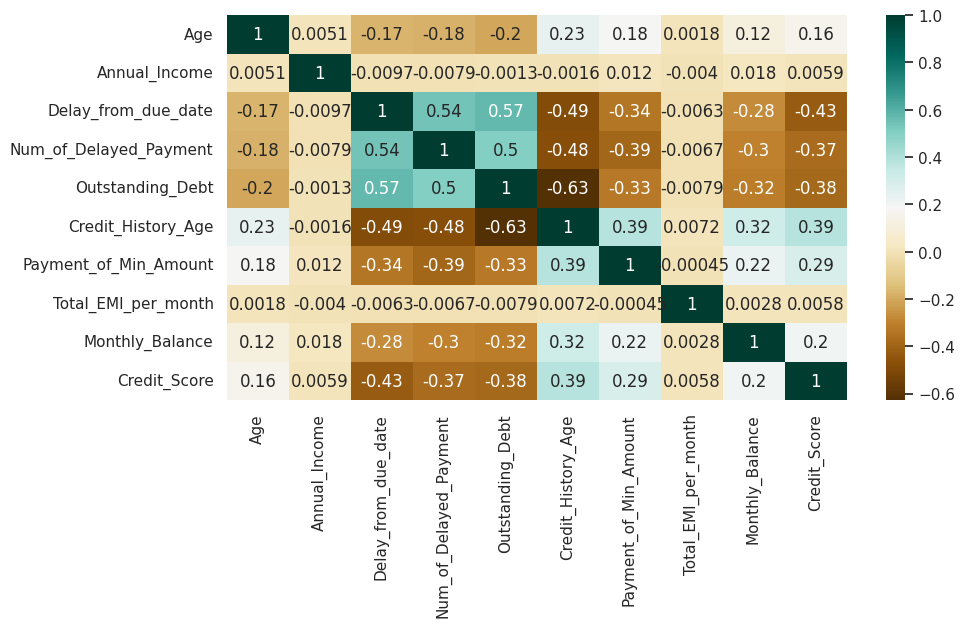

In [ ]:
# Vẽ heatmap về mối tương quan giữa các biến
plt.figure(figsize=(10,5))
c= df_cp.corr() # tính toán ma trận tương quan
sns.heatmap(c,cmap="BrBG",annot=True) # tạo heatmap và hiển thị các giá trị tương quan lên heatmap
c

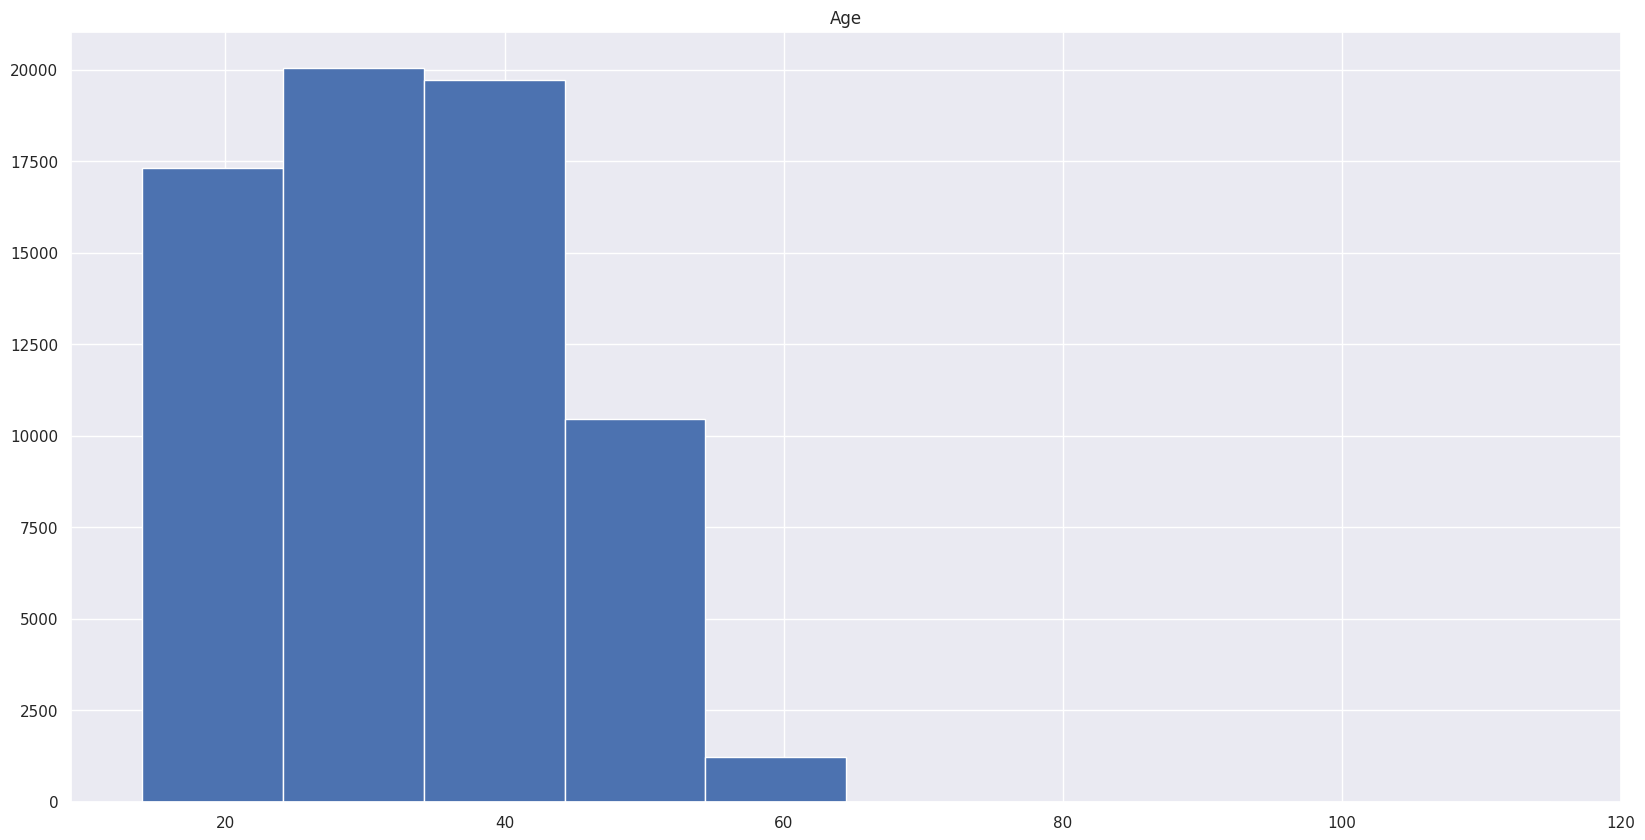

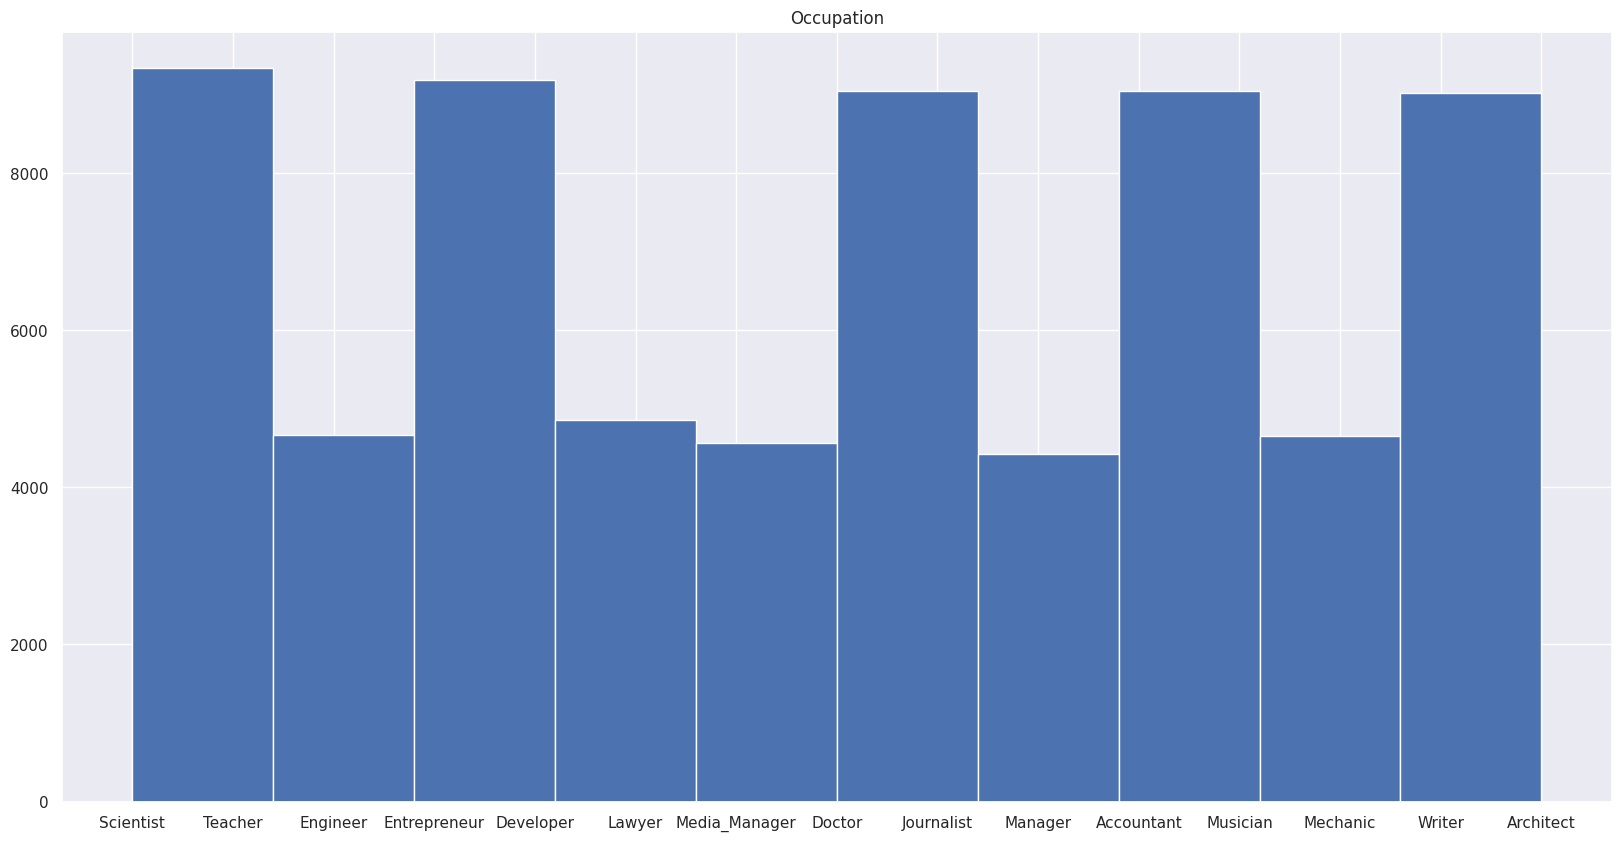

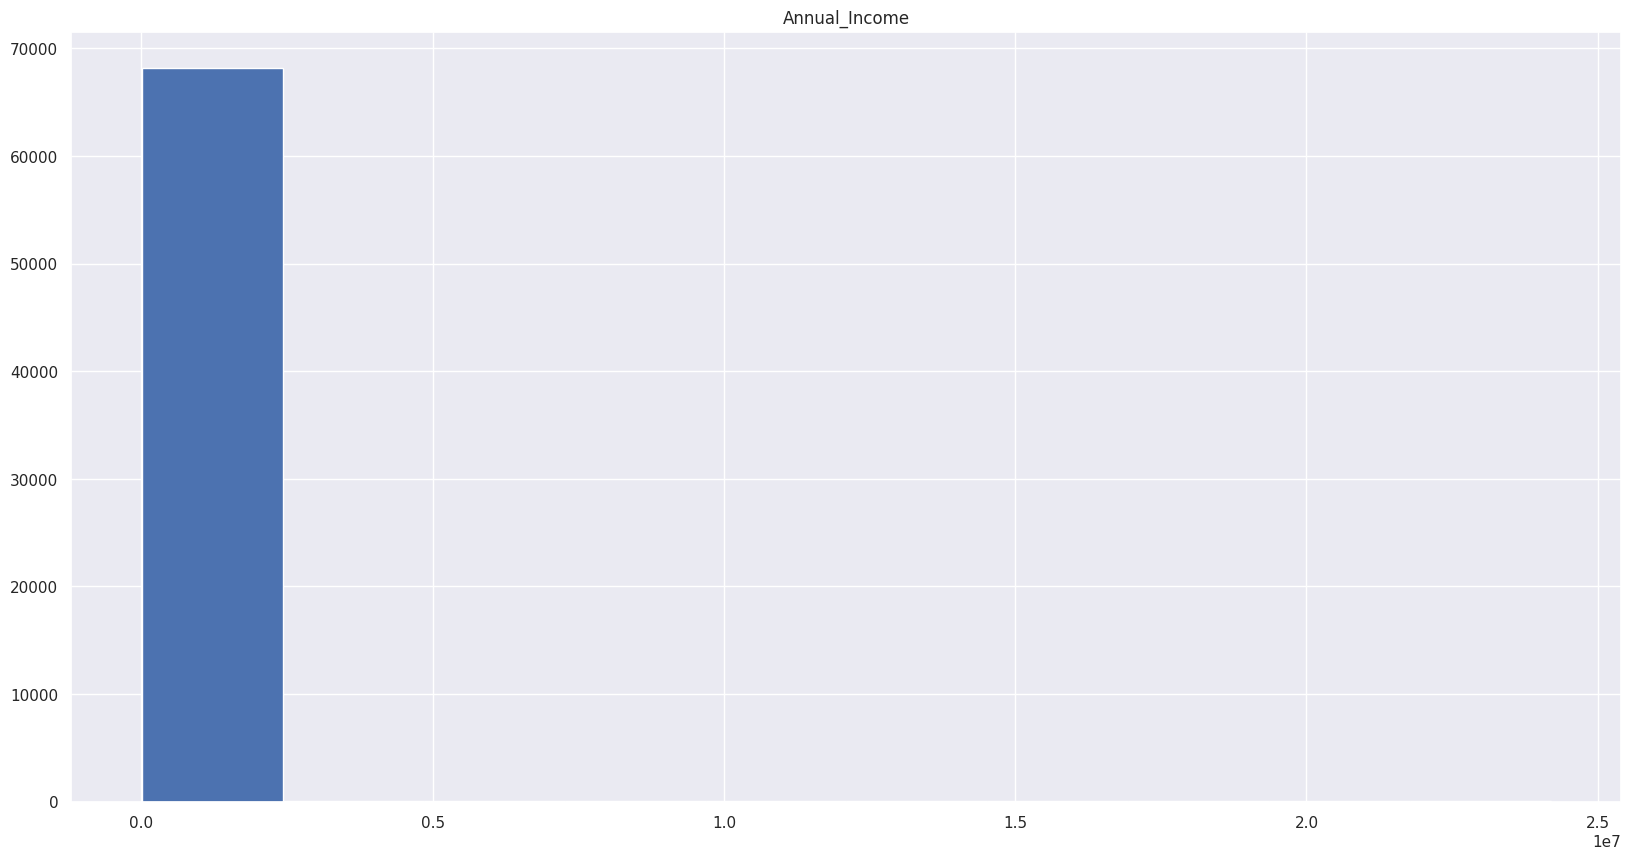

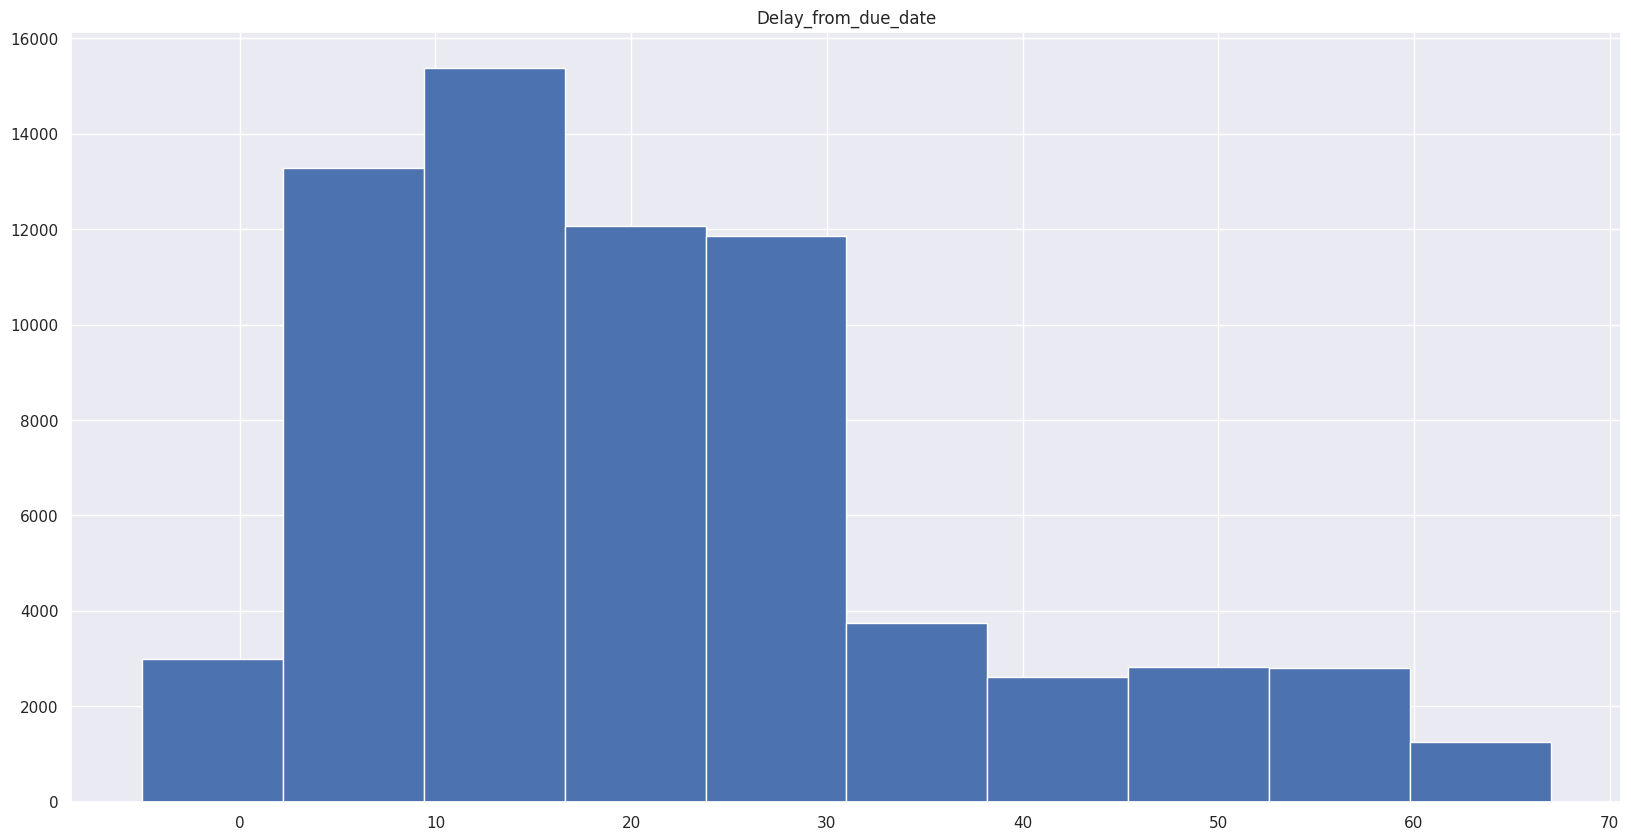

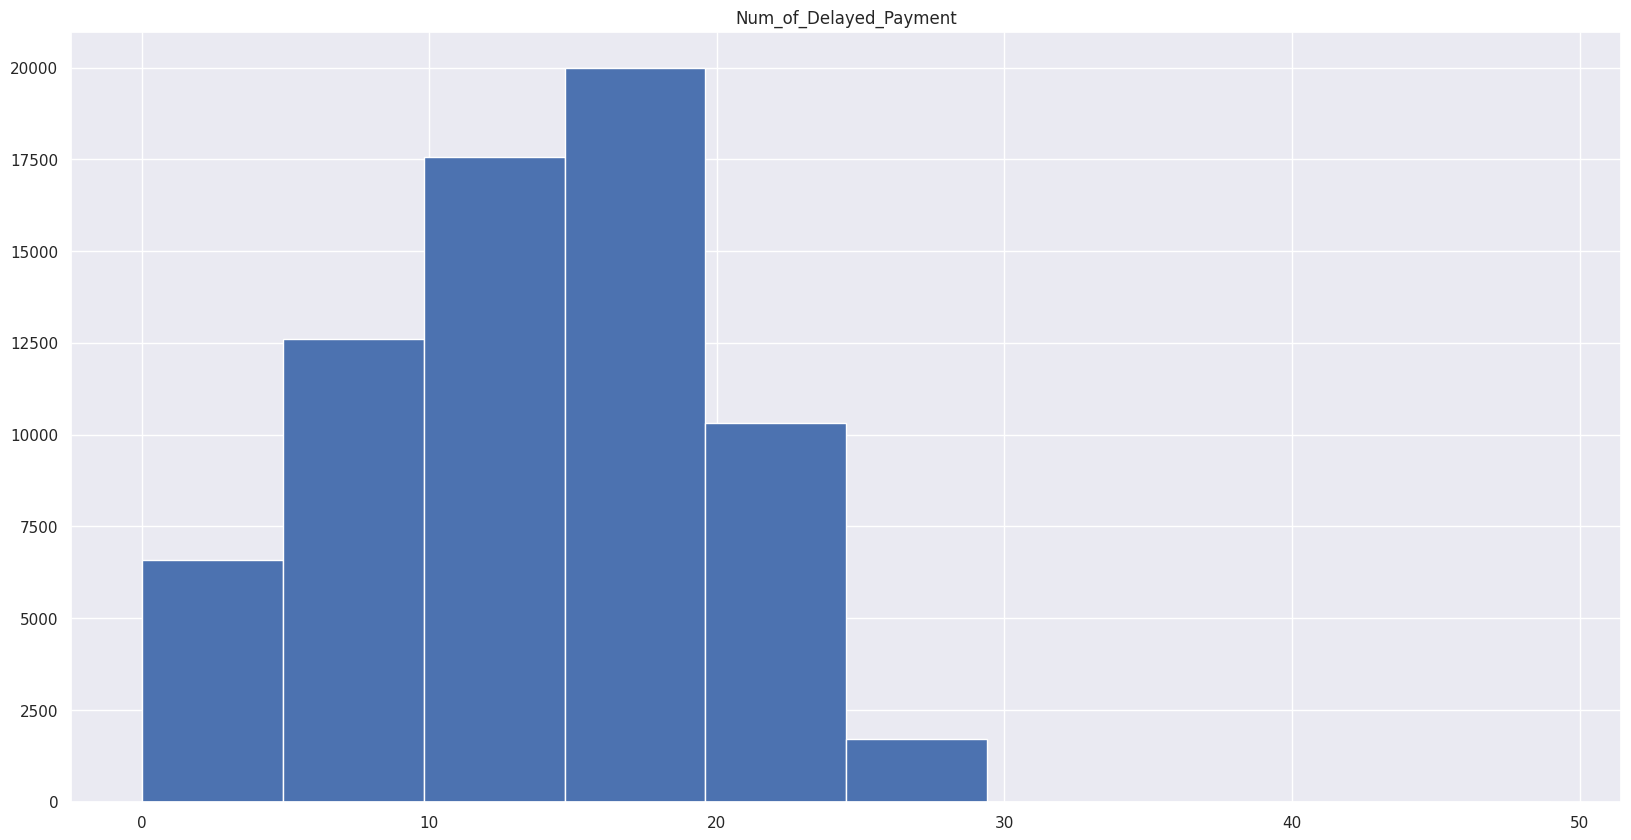

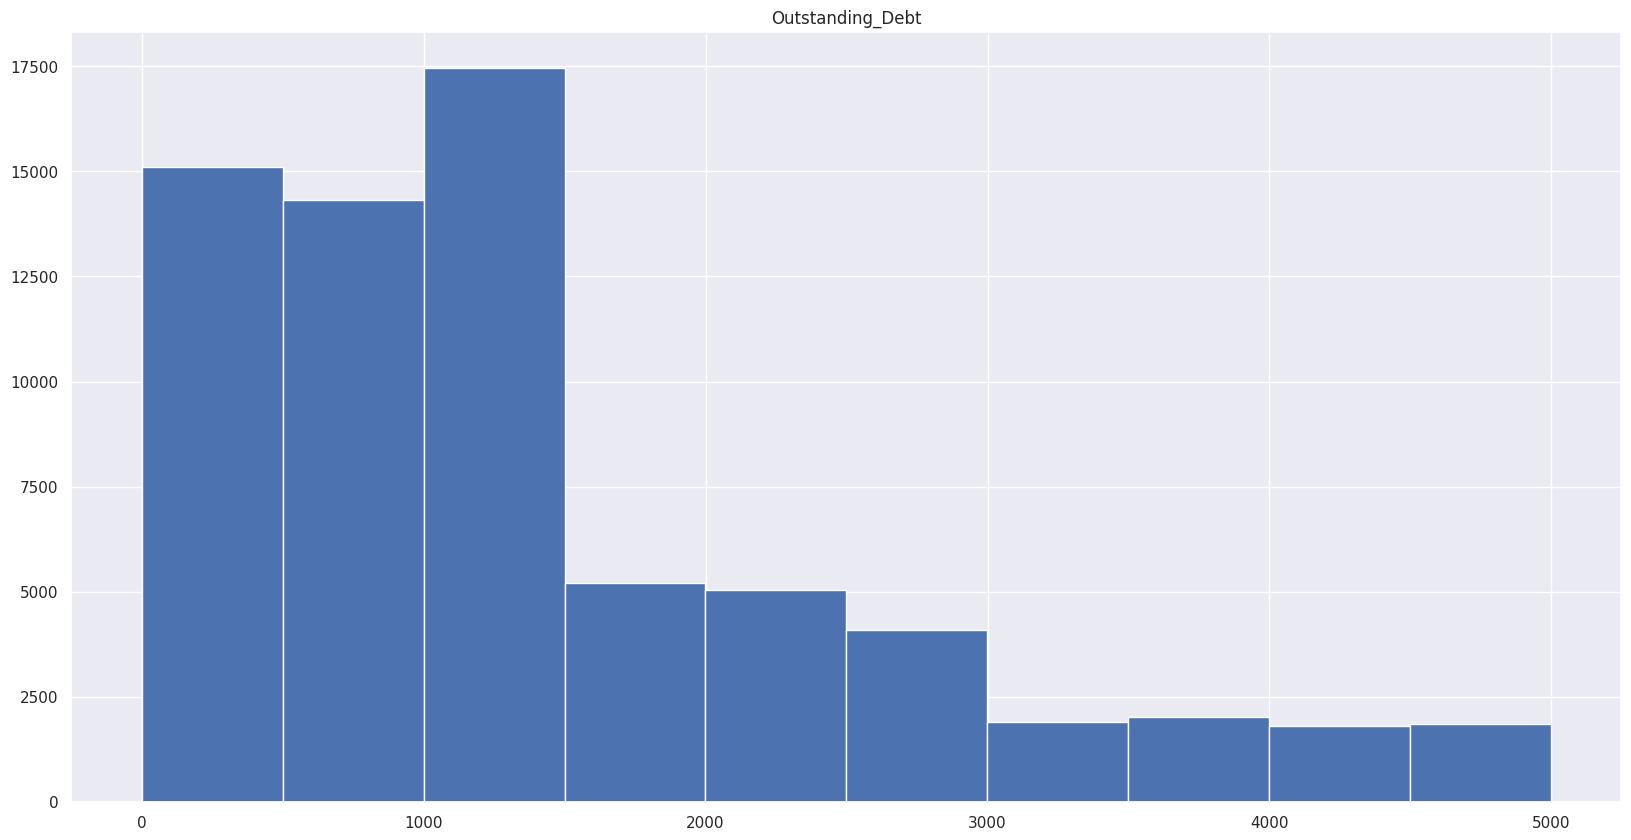

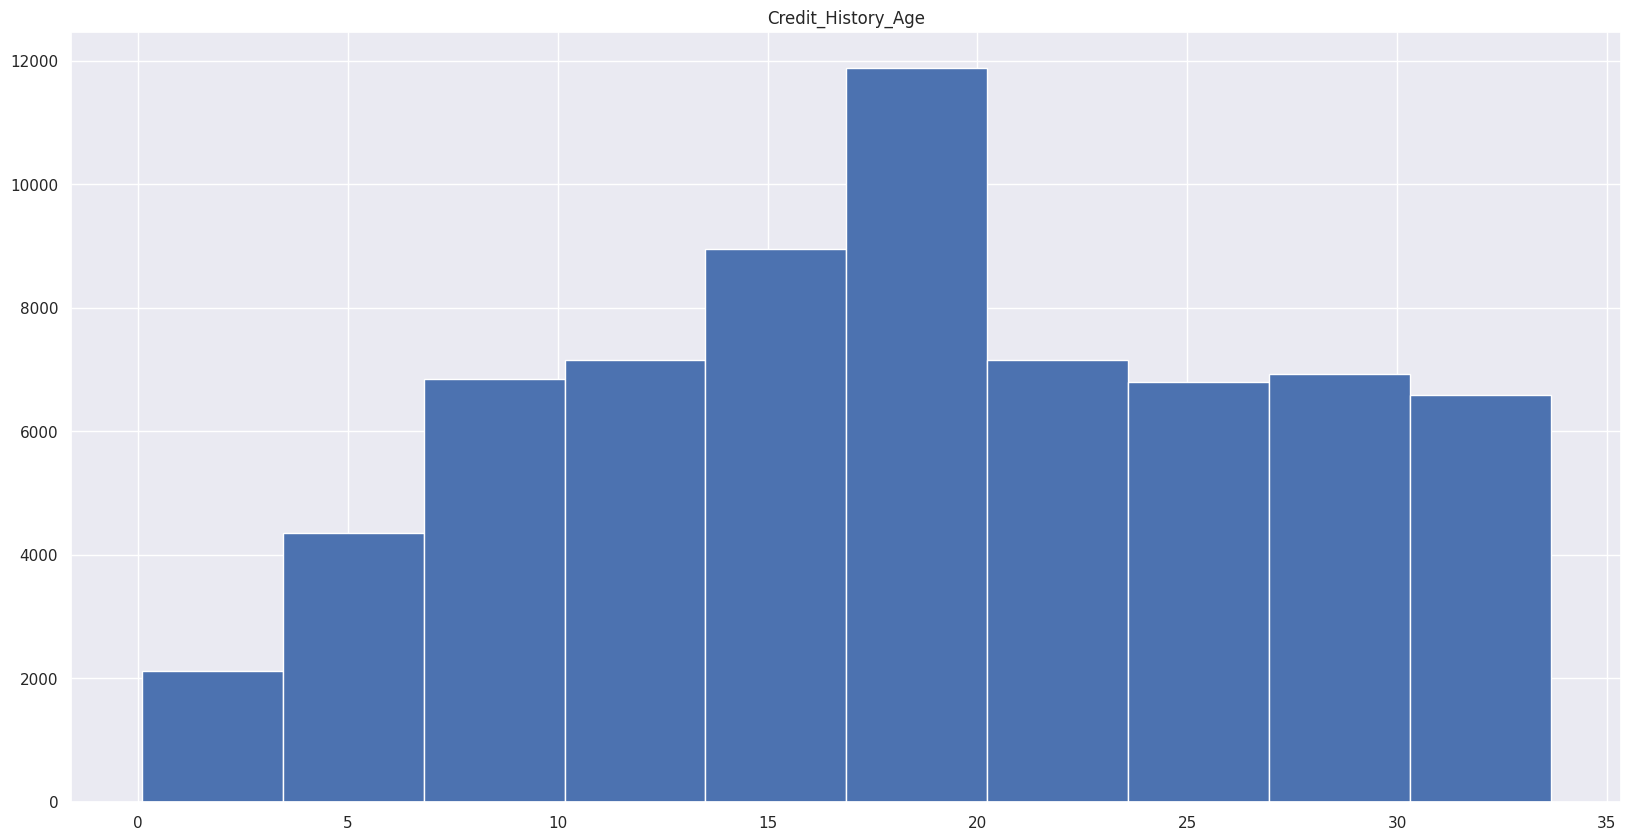

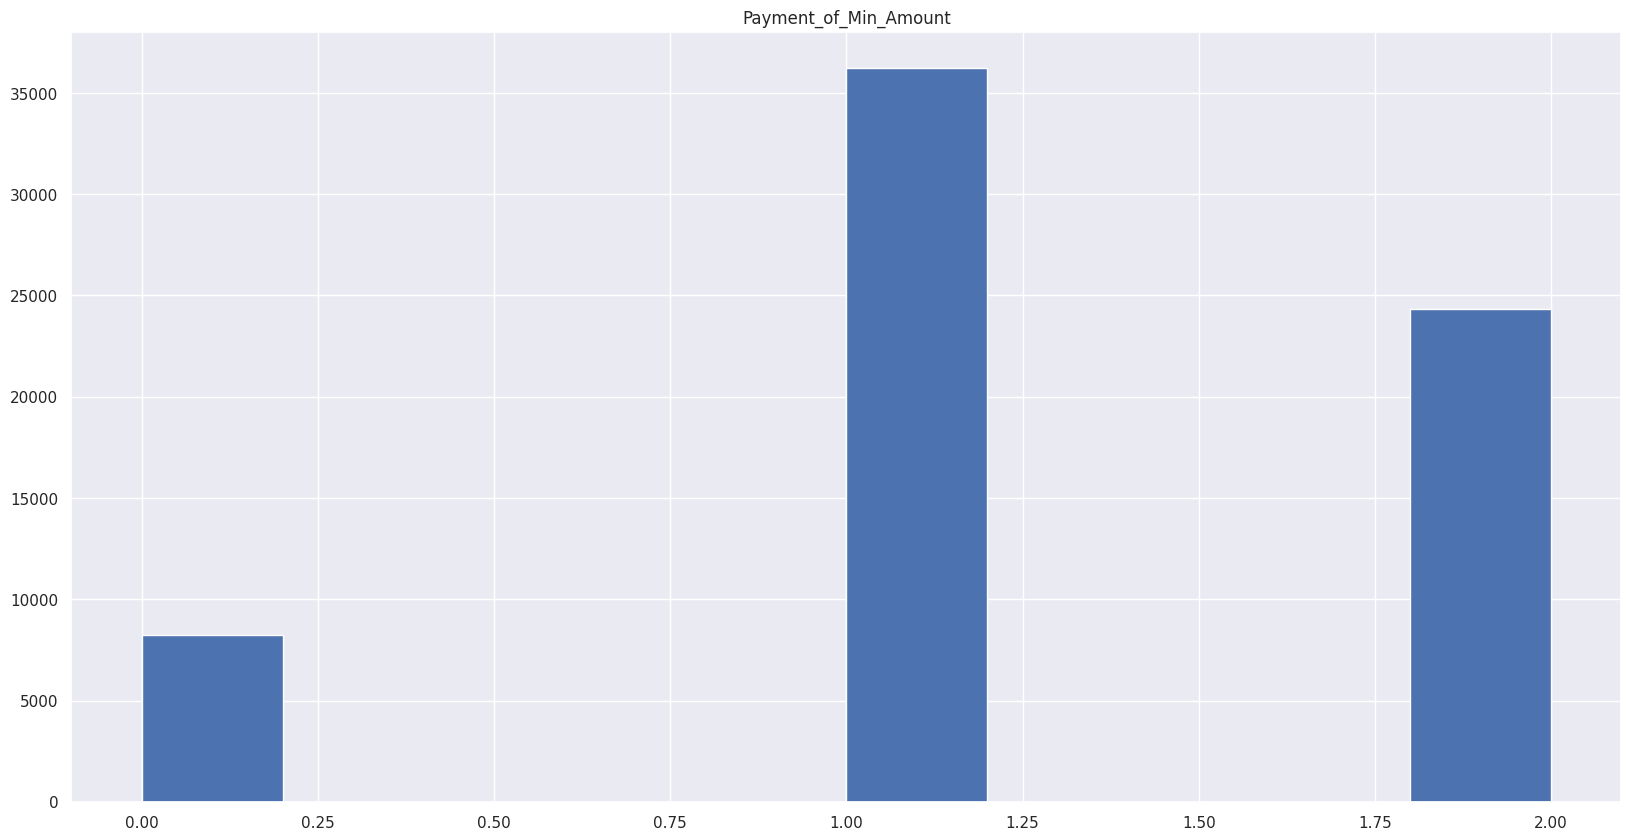

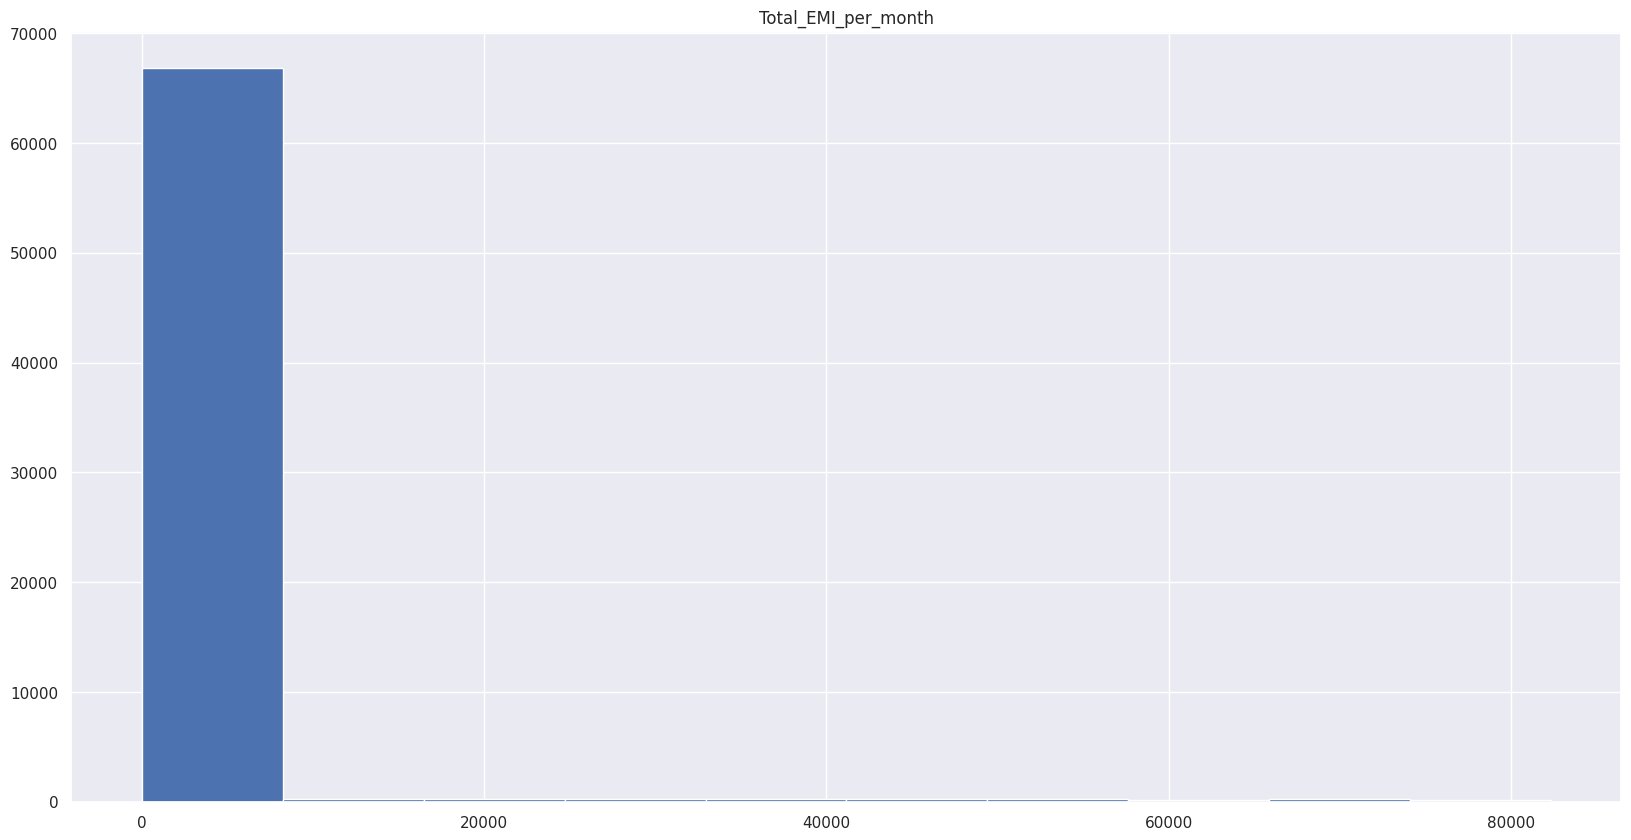

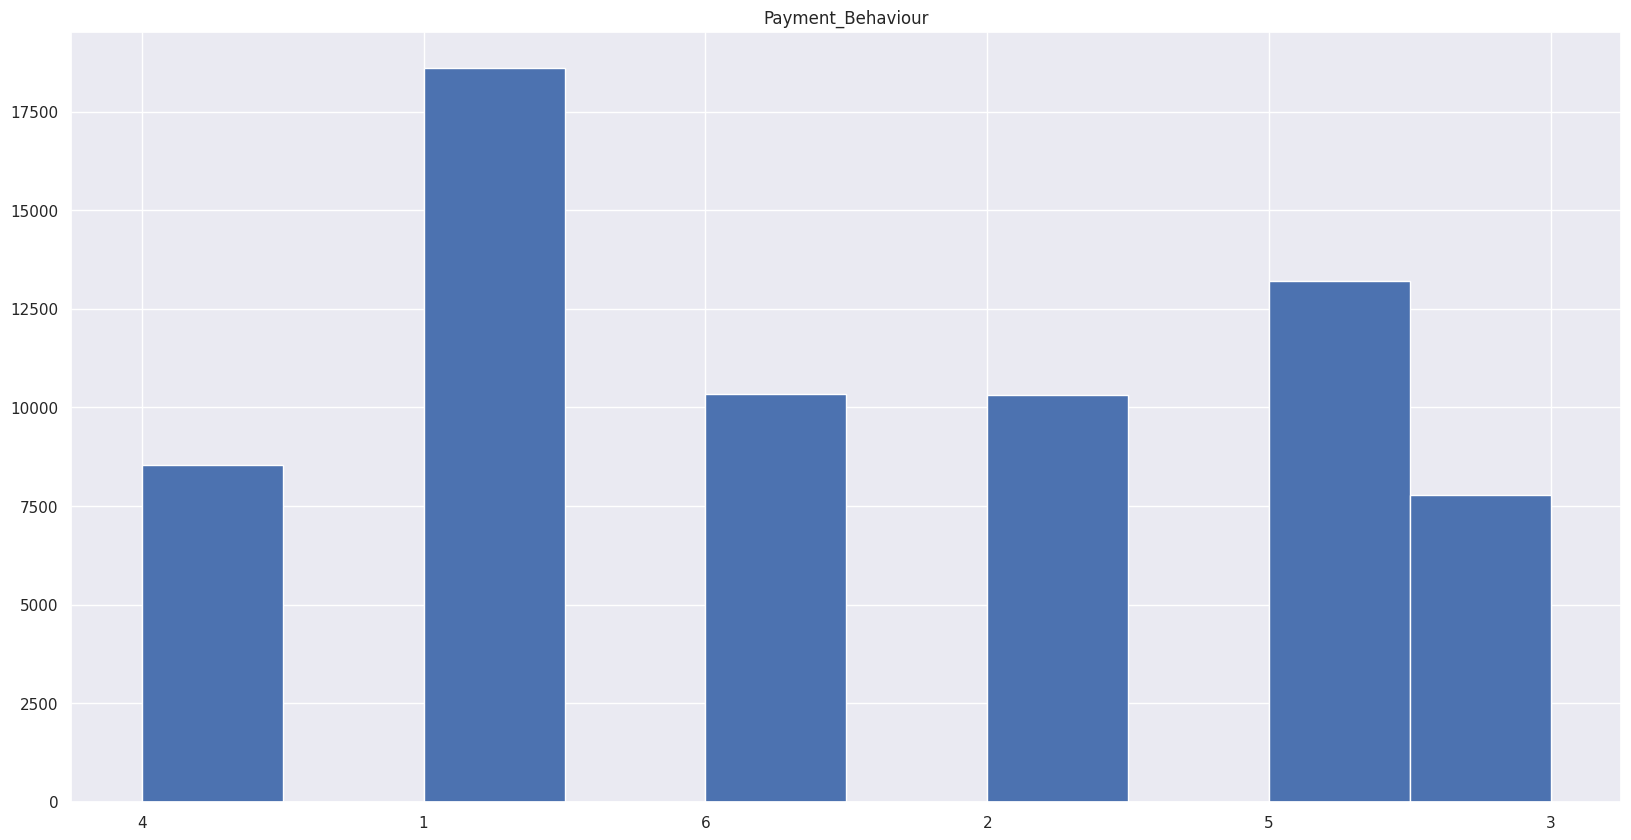

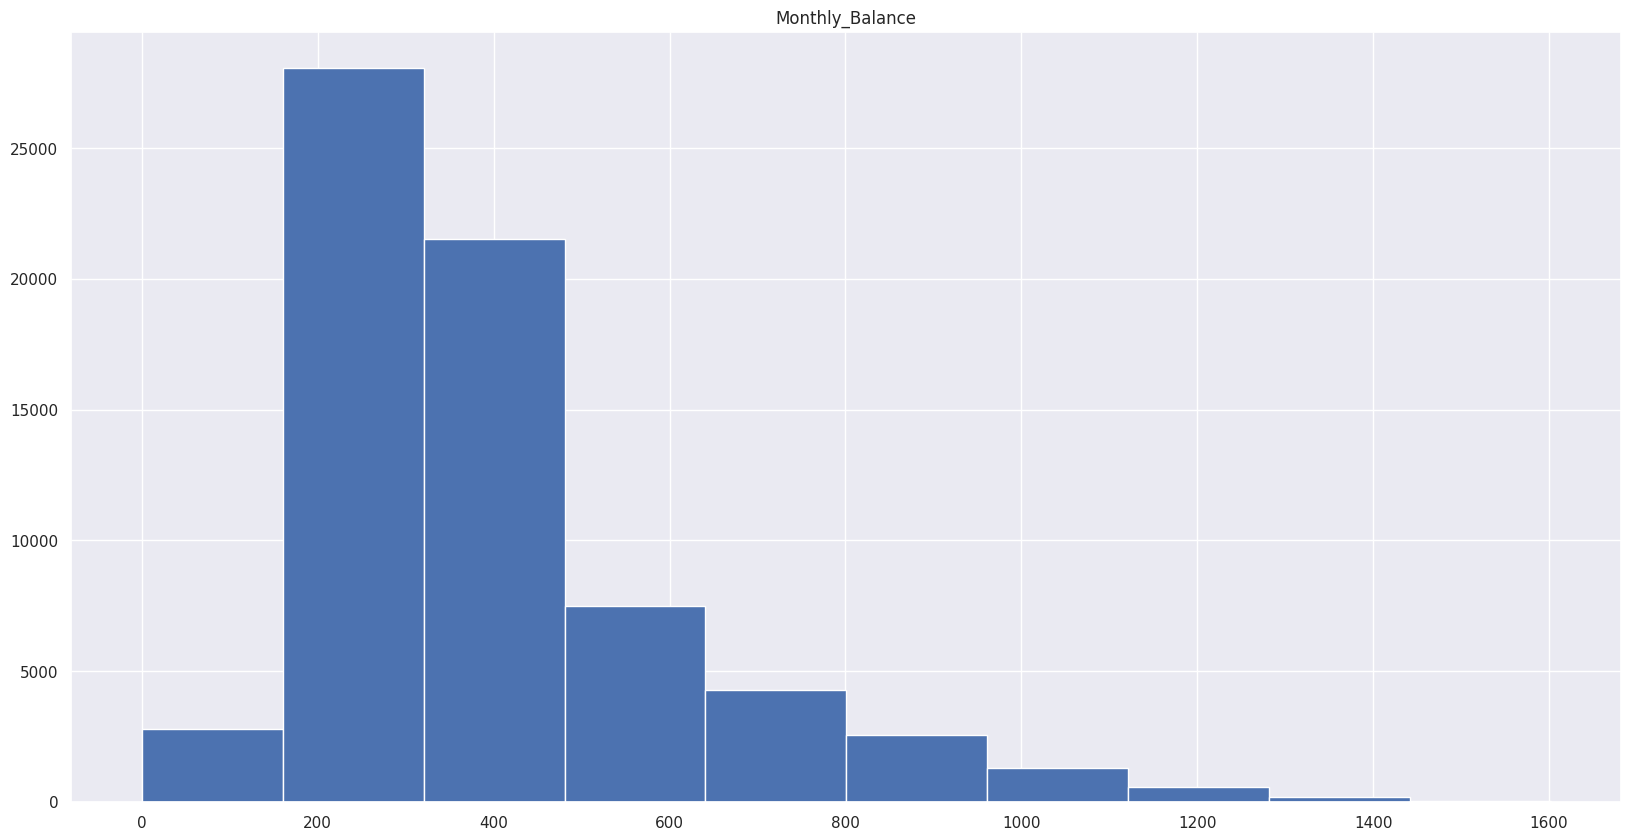

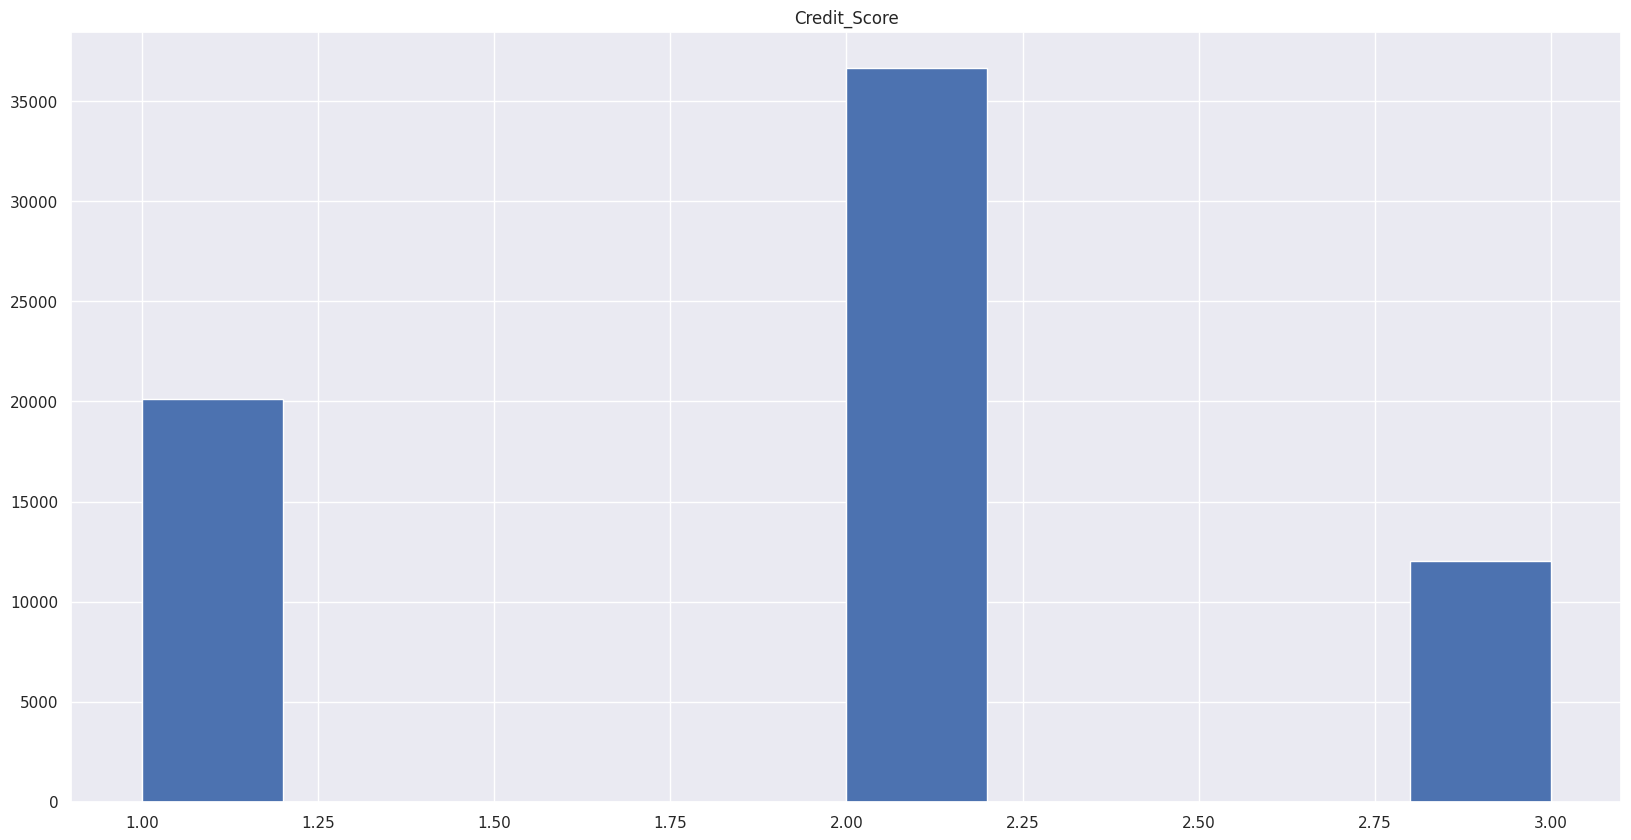

In [ ]:
# Cái này hiển thị riêng
# Biểu đồ hiển thị các phân phối của các biến
for column in df_cp.columns:
    # Tạo một subplot mới cho từng cột
    fig, ax = plt.subplots()
    # Vẽ histogram cho từng cột
    ax.hist(df_cp[column])
    # Đặt tiêu đề cho subplot
    ax.set_title(column)
    # Hiển thị biểu đồ histogram
    plt.show()

array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Annual_Income'}>,
        <Axes: title={'center': 'Delay_from_due_date'}>],
       [<Axes: title={'center': 'Num_of_Delayed_Payment'}>,
        <Axes: title={'center': 'Outstanding_Debt'}>,
        <Axes: title={'center': 'Credit_History_Age'}>],
       [<Axes: title={'center': 'Payment_of_Min_Amount'}>,
        <Axes: title={'center': 'Total_EMI_per_month'}>,
        <Axes: title={'center': 'Monthly_Balance'}>],
       [<Axes: title={'center': 'Credit_Score'}>, <Axes: >, <Axes: >]],
      dtype=object)

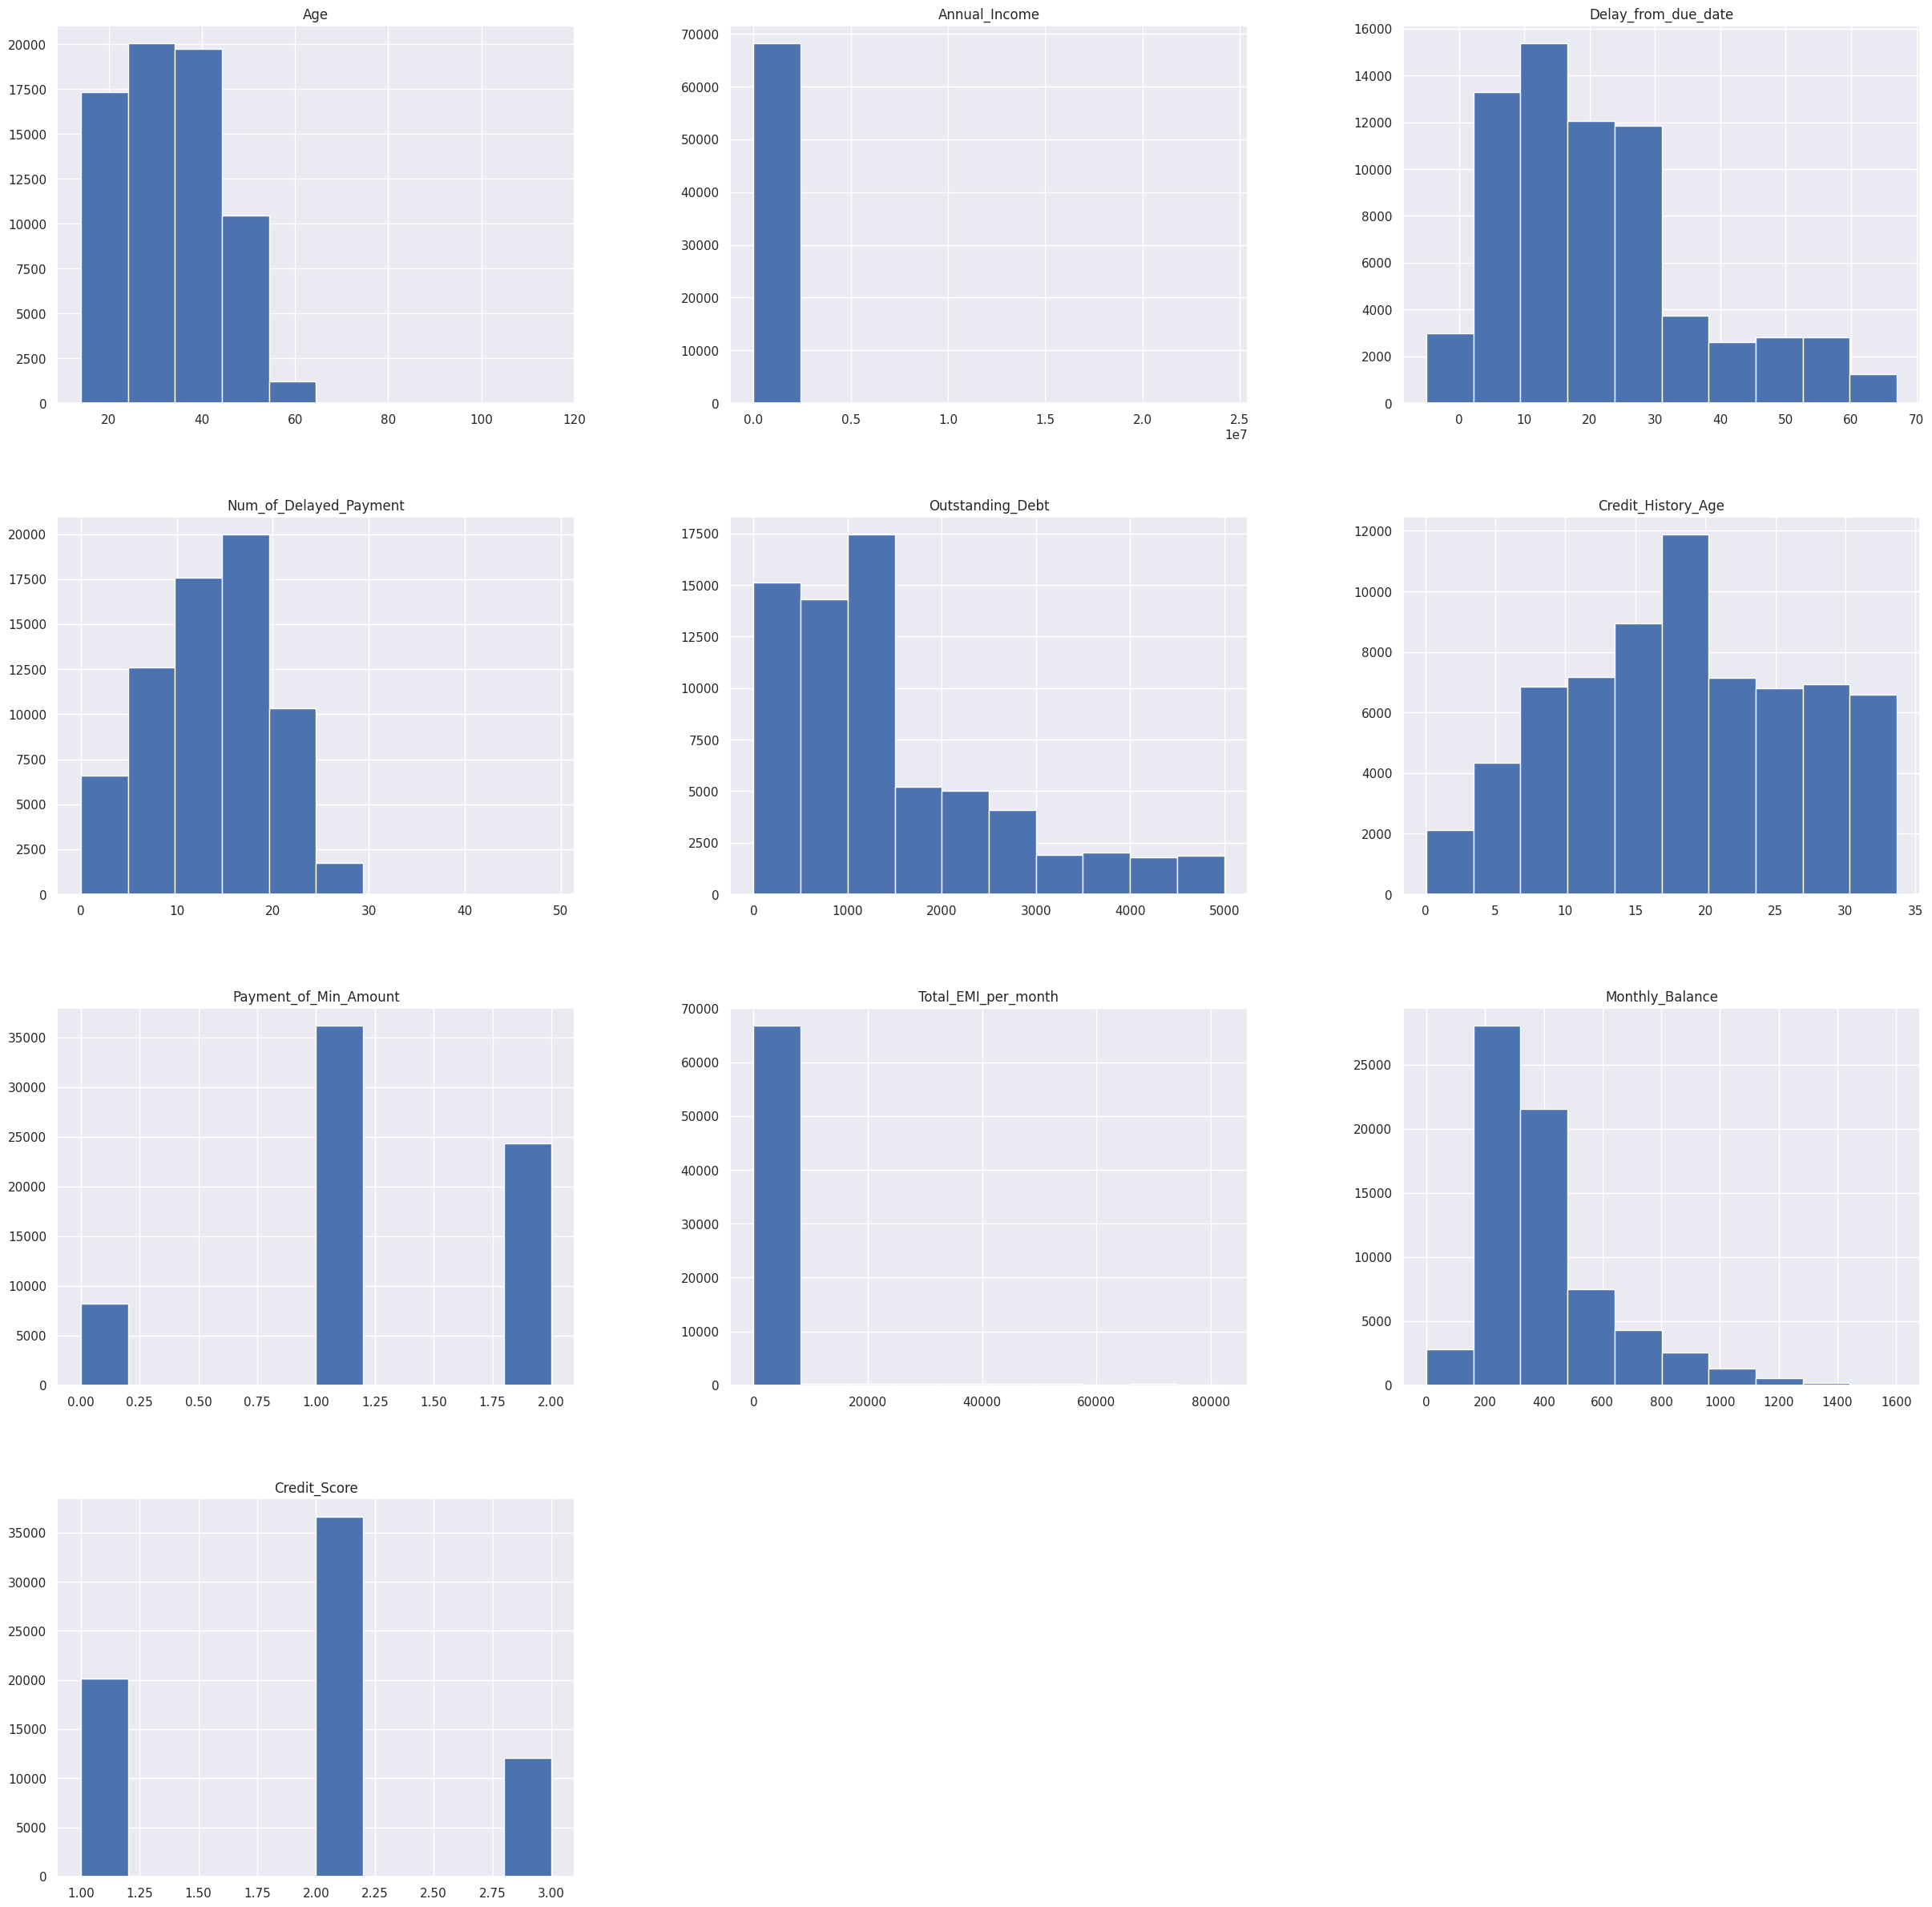

In [ ]:
# Cái này hiển thị chung
# Biểu đồ hiển thị các phân phối của các biến
df_cp.hist(figsize=(30, 30))

# 5. Bình thường hóa

In [ ]:
df_cp.head()

,Age,Occupation,Annual_Income,Delay_from_due_date,Num_of_Delayed_Payment,Outstanding_Debt,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Payment_Behaviour,Monthly_Balance,Credit_Score
0,23.0,Scientist,19114.12,3,7.0,809.98,22.083333,2,49.57,4,312.49,3
3,23.0,Scientist,19114.12,5,4.0,809.98,22.333333,2,49.57,1,223.45,3
6,23.0,Scientist,19114.12,3,8.0,809.98,22.583333,2,49.57,1,244.57,3
9,28.0,Teacher,34847.84,7,1.0,605.03,26.666667,2,18.82,6,484.59,3
11,28.0,Teacher,34847.84,3,3.0,605.03,26.833333,2,18.82,2,465.68,3


In [ ]:
# chuẩn hóa dữ liệu
scaler = MinMaxScaler()
col_float = ['Age','Annual_Income','Delay_from_due_date','Num_of_Delayed_Payment',
             'Outstanding_Debt','Credit_History_Age','Total_EMI_per_month','Monthly_Balance']
for i in df_cp[col_float]:
  df_cp[i] = scaler.fit_transform(df_cp[[i]])
df_cp.head()

,Age,Occupation,Annual_Income,Delay_from_due_date,Num_of_Delayed_Payment,Outstanding_Debt,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0.089109,Scientist,0.000501,0.111111,0.142857,0.162020,0.655087,2,0.000602,4,0.195053,3
3,0.089109,Scientist,0.000501,0.138889,0.081633,0.162020,0.662531,2,0.000602,1,0.139473,3
6,0.089109,Scientist,0.000501,0.111111,0.163265,0.162020,0.669975,2,0.000602,1,0.152656,3
9,0.138614,Teacher,0.001151,0.166667,0.020408,0.121012,0.791563,2,0.000229,6,0.302479,3
11,0.138614,Teacher,0.001151,0.111111,0.061224,0.121012,0.796526,2,0.000229,2,0.290675,3


# 6. Mã hóa

In [ ]:
df_cp.columns

Index(['Age', 'Occupation', 'Annual_Income', 'Delay_from_due_date',
       'Num_of_Delayed_Payment', 'Outstanding_Debt', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month', 'Payment_Behaviour',
       'Monthly_Balance', 'Credit_Score'],
      dtype='object')

In [ ]:
df_cp = pd.get_dummies(df_cp, prefix='Occupation', columns=['Occupation'], drop_first=False)
df_cp.head()

,Age,Annual_Income,Delay_from_due_date,Num_of_Delayed_Payment,Outstanding_Debt,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Payment_Behaviour,Monthly_Balance,...,Occupation_Entrepreneur,Occupation_Journalist,Occupation_Lawyer,Occupation_Manager,Occupation_Mechanic,Occupation_Media_Manager,Occupation_Musician,Occupation_Scientist,Occupation_Teacher,Occupation_Writer
0,0.089109,0.000501,0.111111,0.142857,0.162020,0.655087,2,0.000602,4,0.195053,...,0,0,0,0,0,0,0,1,0,0
3,0.089109,0.000501,0.138889,0.081633,0.162020,0.662531,2,0.000602,1,0.139473,...,0,0,0,0,0,0,0,1,0,0
6,0.089109,0.000501,0.111111,0.163265,0.162020,0.669975,2,0.000602,1,0.152656,...,0,0,0,0,0,0,0,1,0,0
9,0.138614,0.001151,0.166667,0.020408,0.121012,0.791563,2,0.000229,6,0.302479,...,0,0,0,0,0,0,0,0,1,0
11,0.138614,0.001151,0.111111,0.061224,0.121012,0.796526,2,0.000229,2,0.290675,...,0,0,0,0,0,0,0,0,1,0


In [ ]:
#Select all columns
feed = df_cp[['Age', 'Annual_Income', 'Delay_from_due_date', 'Num_of_Delayed_Payment',
       'Outstanding_Debt', 'Credit_History_Age', 'Payment_of_Min_Amount',
       'Total_EMI_per_month', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score', 'Occupation_Accountant', 'Occupation_Architect',
       'Occupation_Developer', 'Occupation_Doctor', 'Occupation_Engineer',
       'Occupation_Entrepreneur', 'Occupation_Journalist', 'Occupation_Lawyer',
       'Occupation_Manager', 'Occupation_Mechanic', 'Occupation_Media_Manager',
       'Occupation_Musician', 'Occupation_Scientist', 'Occupation_Teacher',
       'Occupation_Writer']]

In [ ]:
df_train_x = feed.drop('Credit_Score',axis = 1)
df_train_y = feed['Credit_Score']
x_train, x_test, y_train, y_test = train_test_split(df_train_x, df_train_y, test_size=0.20, random_state=42)

# 7. Mô hình

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(random_state=1)
dtree = dtree.fit(x_train, y_train)

y_pred = dtree.predict(x_test)
cm = confusion_matrix(y_test,y_pred)
accuracy = accuracy_score(y_test,y_pred)
print("confusion matrics=",cm)
print("  ")
print("accuracy=",accuracy)

confusion matrics= [[2805 1086  138]
 [1147 5309  875]
 [ 134  859 1402]]
  
accuracy= 0.6918211559432933


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier()
kn.fit(x_train, y_train)
kn_y_pred = kn.predict(x_test)
kn_cm = confusion_matrix(y_test,kn_y_pred)
kn_accuracy = accuracy_score(y_test,kn_y_pred)
print("confusion matrics=",kn_cm)
print("  ")
print("accuracy=",kn_accuracy)

confusion matrics= [[2406 1446  177]
 [1422 5194  715]
 [ 218 1252  925]]
  
accuracy= 0.6197746274082152


In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=10)
rf.fit(x_train, y_train)
rf_y_pred = rf.predict(x_test)
rf_cm = confusion_matrix(y_test,rf_y_pred)
rf_accuracy = accuracy_score(y_test,rf_y_pred)
print("confusion matrics=",rf_cm)
print("  ")
print("accuracy=",rf_accuracy)

confusion matrics= [[3131  834   64]
 [ 888 5922  521]
 [  14  860 1521]]
  
accuracy= 0.7687386404943657


## KNN

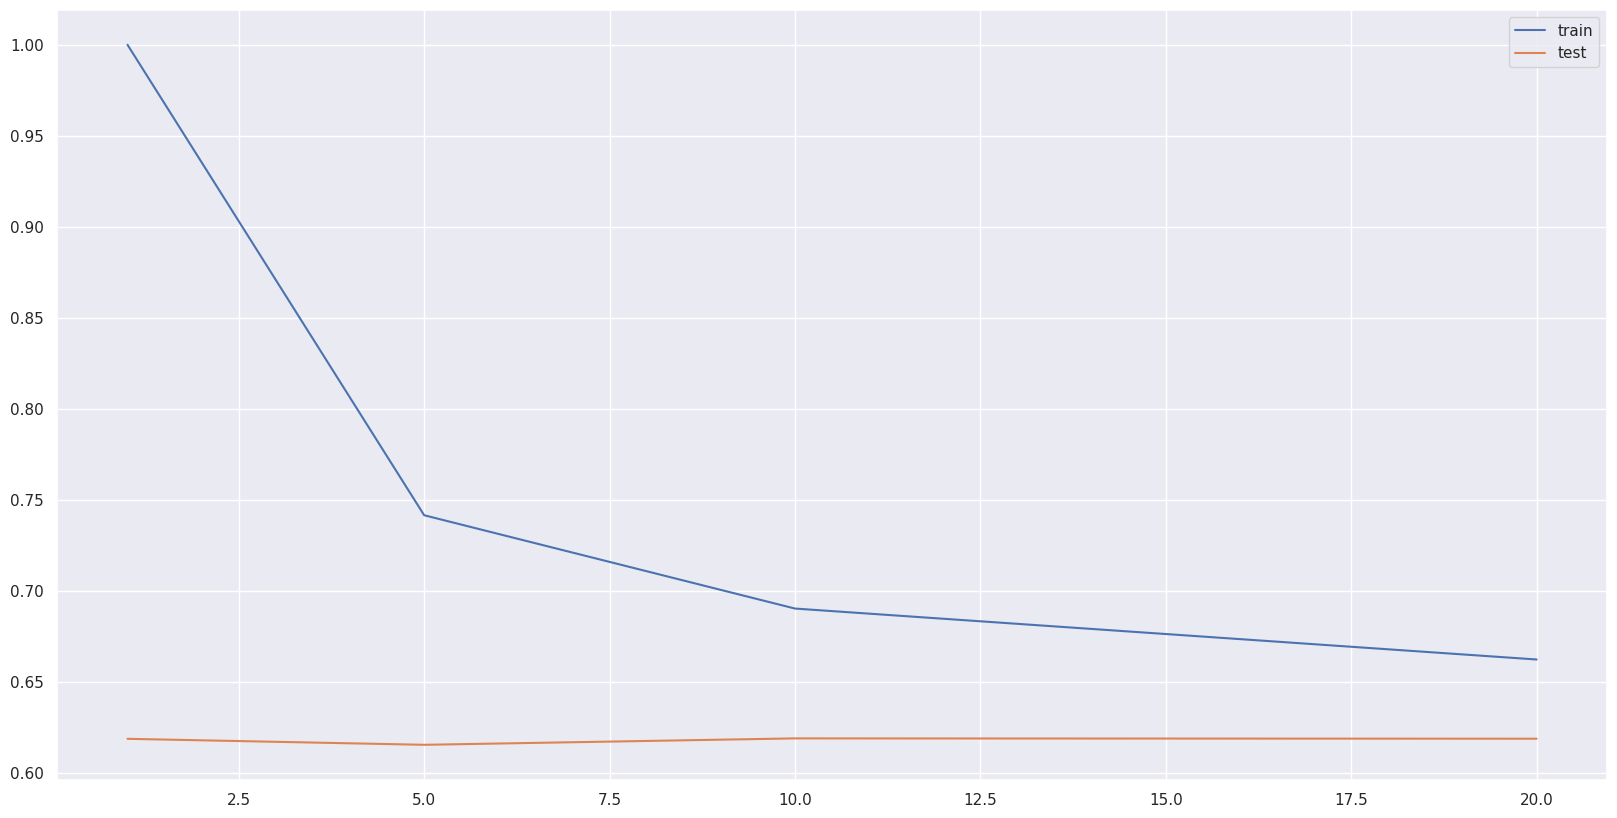

10

In [ ]:
x = [1, 5, 10, 20] # Khởi tạo K
train = [] # Khởi tạo mảng train
test = [] # Khởi tạo mảng test

for val in x: # khởi tạo loop cho các K đã khởi tạo
    knn2 = KNeighborsClassifier(n_neighbors=val) # Khởi tạo thuật toán
    cv = cross_validate(knn2, x_train, y_train, return_train_score=True) # Đánh giá mô hình cho từng K
    train.append(cv['train_score'].mean()) # Thêm kết quả training vào mảng train
    test.append(cv['test_score'].mean()) # Thêm kết quả test vào mảng test

sns.lineplot(x=x, y=train, label='train') # Vẽ đường thẳng hiển thị training
sns.lineplot(x=x, y=test, label='test') # Vẽ đường thẳng hiển thị test
plt.show()

x[np.argmax(test)] # Xuất giá trị K tốt nhất

In [ ]:
knn = KNeighborsClassifier(n_neighbors=10) # Khởi tạo thuật toán KNN có n_neighbors = 10
knn.fit(x_train, y_train) # training data

KNeighborsClassifier(n_neighbors=10)

In [ ]:
y_predict = knn.predict(x_test) # Dự đoán y cho tập x_test

In [ ]:
# Danh gia mo hinh
scores = cross_val_score(knn, x_test, y_test, cv=5) # dùng hàm cross_val_score đánh giá mô hình
tb_scores = np.mean(scores) # Xuất số điểm dự đoán
print(tb_scores*100) # Xuất số điểm dự đoán

58.967648127953474


In [ ]:
accuracy = accuracy_score(y_test, y_predict) # dùng hàm accuracy_score đánh giá mô hình
print(accuracy*100) # Xuất điểm 
print(classification_report(y_test, y_predict)) # dùng hàm classification_report đánh giá mô hình

62.399127589967286
              precision    recall  f1-score   support

           1       0.62      0.62      0.62      4029
           2       0.66      0.71      0.68      7331
           3       0.48      0.36      0.42      2395

    accuracy                           0.62     13755
   macro avg       0.59      0.56      0.57     13755
weighted avg       0.62      0.62      0.62     13755



## Decision tree

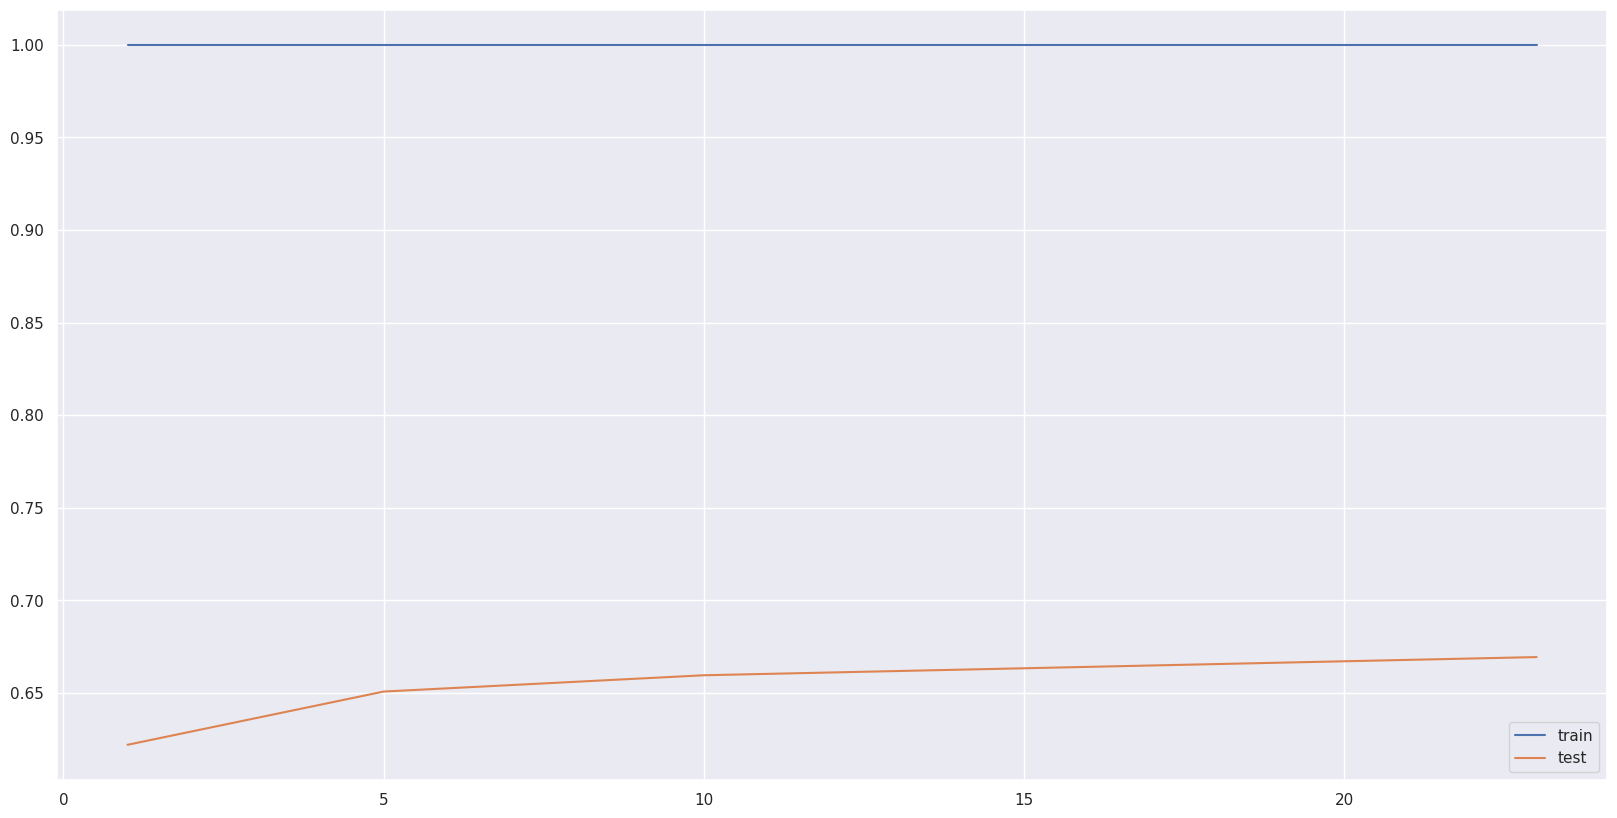

23

In [ ]:
# find max_features
x = [1,5,10,23]
train = []
test = []

for val in x: # khởi tạo loop cho max_features đã khởi tạo
    tree2 = DecisionTreeClassifier(random_state=42,
                                     max_features=val)
    cv = cross_validate(tree2, x_train, y_train, return_train_score=True) # Đánh giá mô hình
    train.append(cv['train_score'].mean()) # Thêm kết quả training vào mảng train
    test.append(cv['test_score'].mean()) # Thêm kết quả test vào mảng test

sns.lineplot(x=x, y=train, label='train') # Vẽ đường thẳng hiển thị training
sns.lineplot(x=x, y=test, label='test') # Vẽ đường thẳng hiển thị test
plt.show()

x[np.argmax(test)] # Xuất giá trị tốt nhất

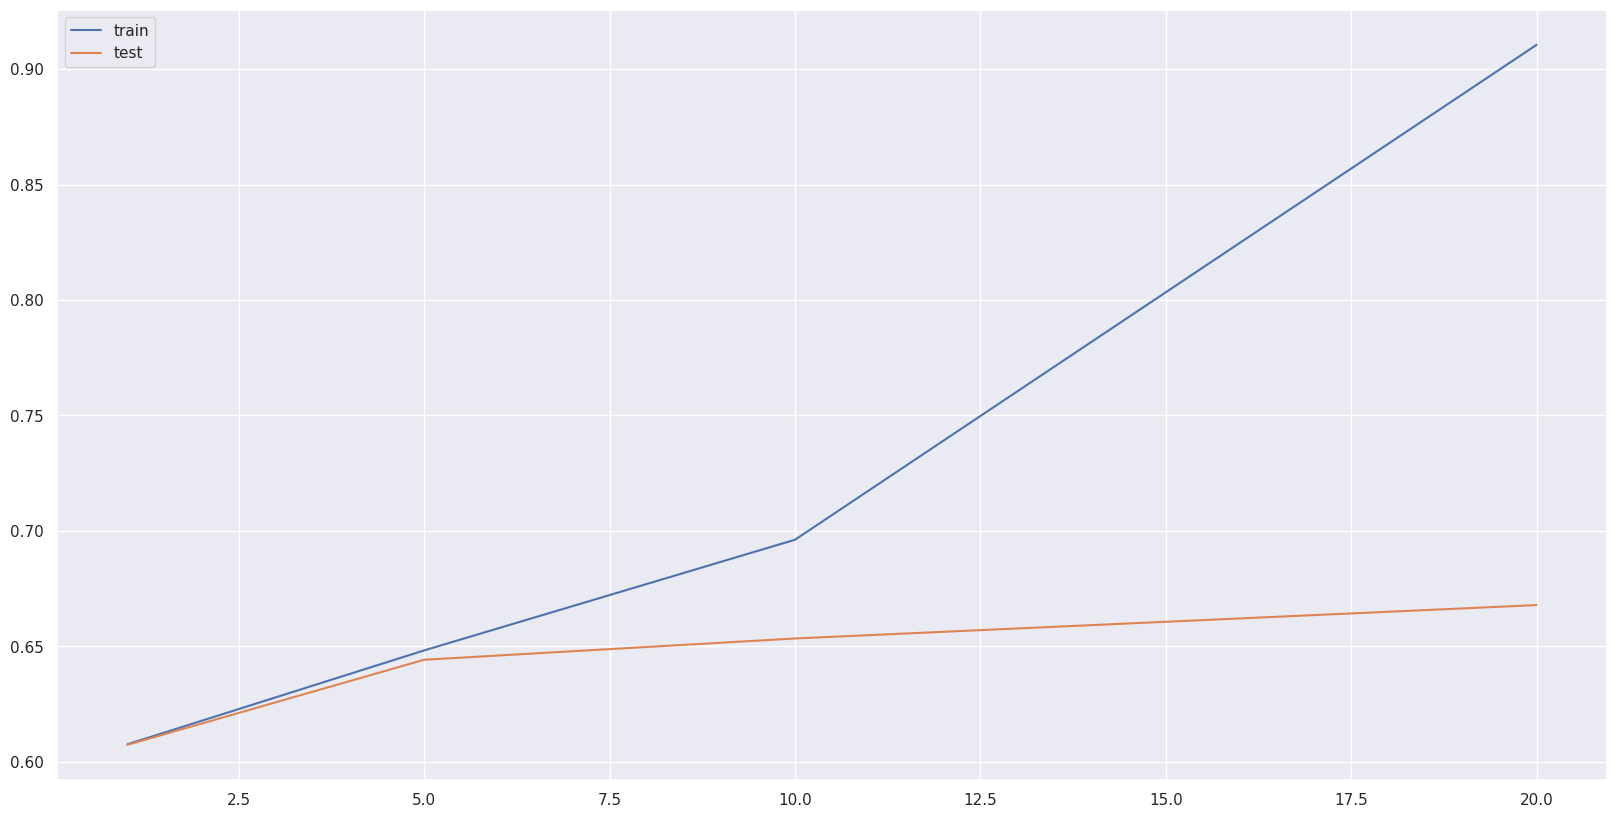

20

In [ ]:
# find max_depth
x = [1,5,10,20]
train = []
test = []

for val in x: # khởi tạo loop cho đã khởi tạo
    tree2 = DecisionTreeClassifier(random_state=42,
                                   max_features=23,
                                   max_depth=val)
    cv = cross_validate(tree2, x_train, y_train, return_train_score=True) # Đánh giá mô hình
    train.append(cv['train_score'].mean()) # Thêm kết quả training vào mảng train
    test.append(cv['test_score'].mean()) # Thêm kết quả test vào mảng test

sns.lineplot(x=x, y=train, label='train') # Vẽ đường thẳng hiển thị training
sns.lineplot(x=x, y=test, label='test') # Vẽ đường thẳng hiển thị test
plt.show()

x[np.argmax(test)] # Xuất giá trị tốt nhất

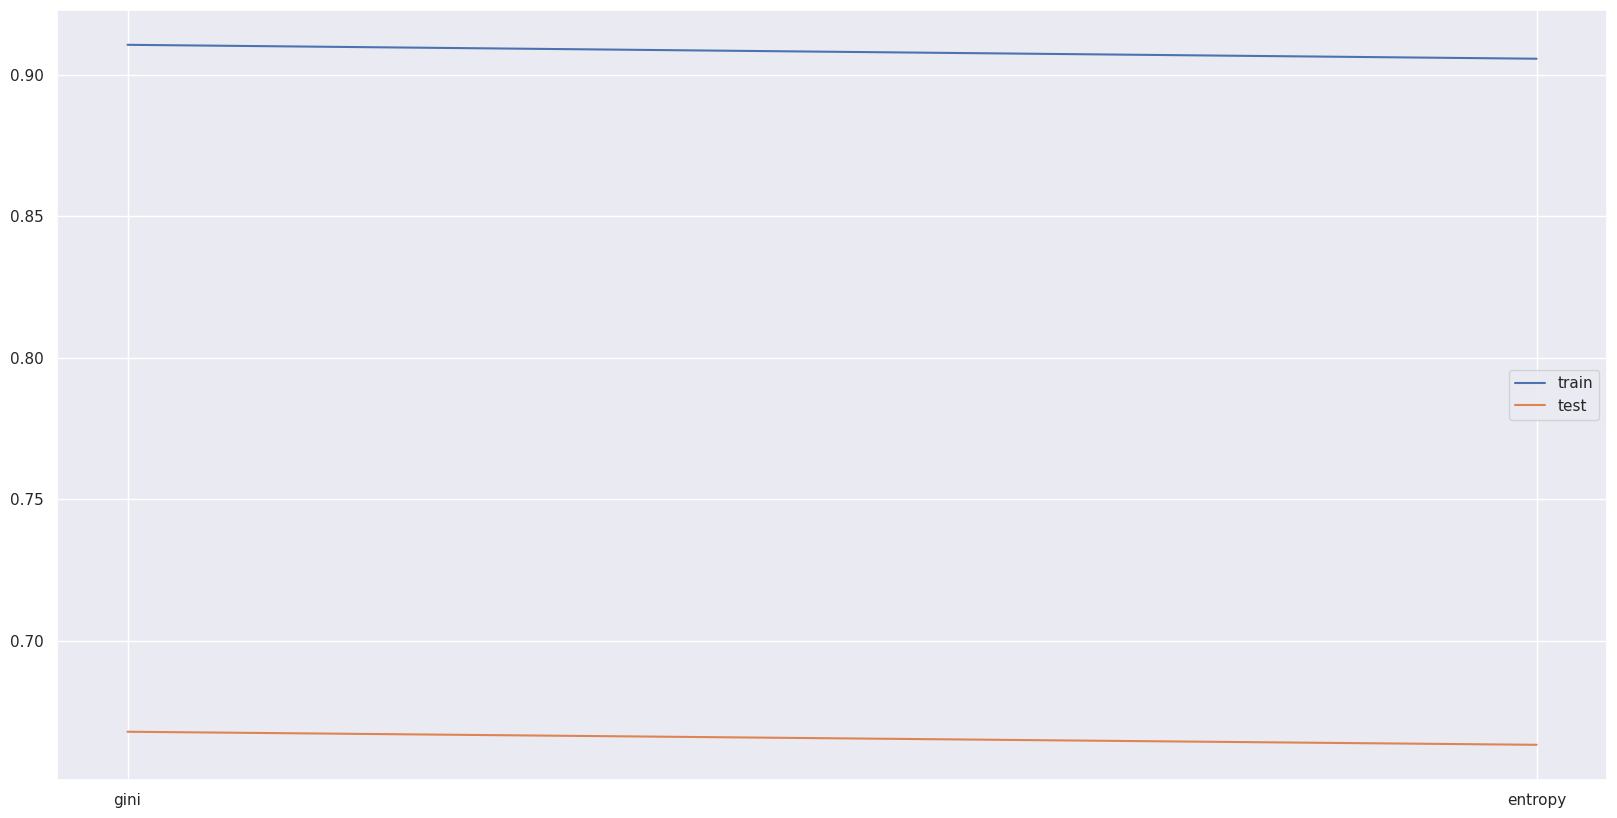

'gini'

In [ ]:
# criterion
x = ['gini', 'entropy']
train = []
test = []

for val in x: # khởi tạo loop cho đã khởi tạo
    tree2 = DecisionTreeClassifier(random_state=42,
                                   max_features=23,
                                   max_depth=20,
                                   criterion = val)
    cv = cross_validate(tree2, x_train, y_train, return_train_score=True) # Đánh giá mô hình
    train.append(cv['train_score'].mean()) # Thêm kết quả training vào mảng train
    test.append(cv['test_score'].mean()) # Thêm kết quả test vào mảng test

sns.lineplot(x=x, y=train, label='train') # Vẽ đường thẳng hiển thị training
sns.lineplot(x=x, y=test, label='test') # Vẽ đường thẳng hiển thị test
plt.show()

x[np.argmax(test)] # Xuất giá trị tốt nhất

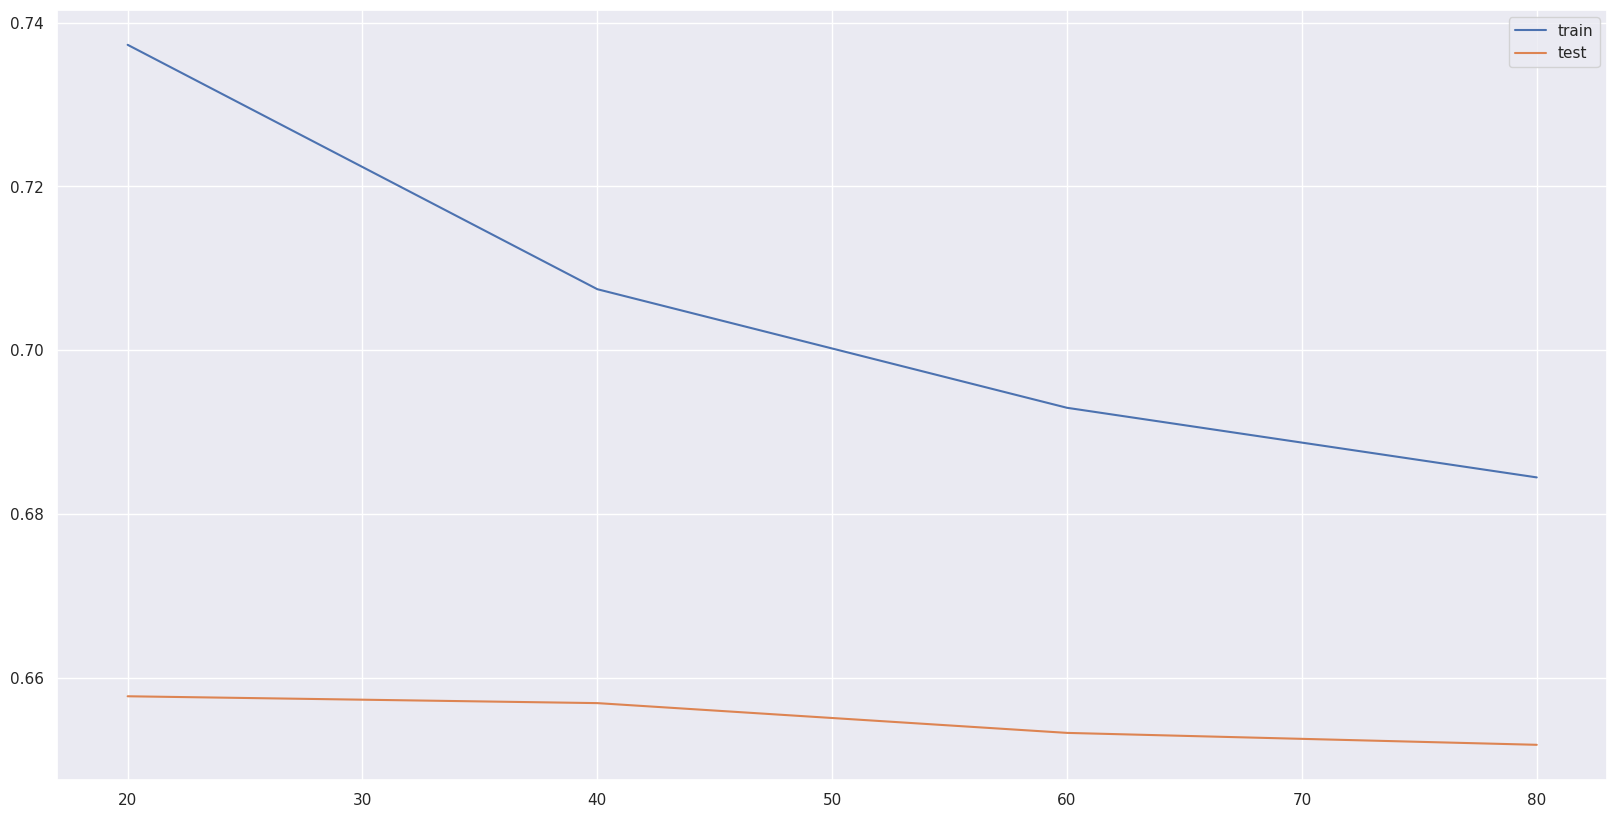

20

In [ ]:
# min_samples_leaf
x = [20,40,60,80]
train = []
test = []

for val in x: # khởi tạo loop cho đã khởi tạo
    tree2 = DecisionTreeClassifier(random_state=42,
                                   max_features=23,
                                   max_depth=20,
                                   criterion= 'gini',
                                   min_samples_leaf=val)
    cv = cross_validate(tree2, x_train, y_train, return_train_score=True) # Đánh giá mô hình
    train.append(cv['train_score'].mean()) # Thêm kết quả training vào mảng train
    test.append(cv['test_score'].mean()) # Thêm kết quả test vào mảng test

sns.lineplot(x=x, y=train, label='train') # Vẽ đường thẳng hiển thị training
sns.lineplot(x=x, y=test, label='test') # Vẽ đường thẳng hiển thị test
plt.show()

x[np.argmax(test)] # Xuất giá trị tốt nhất

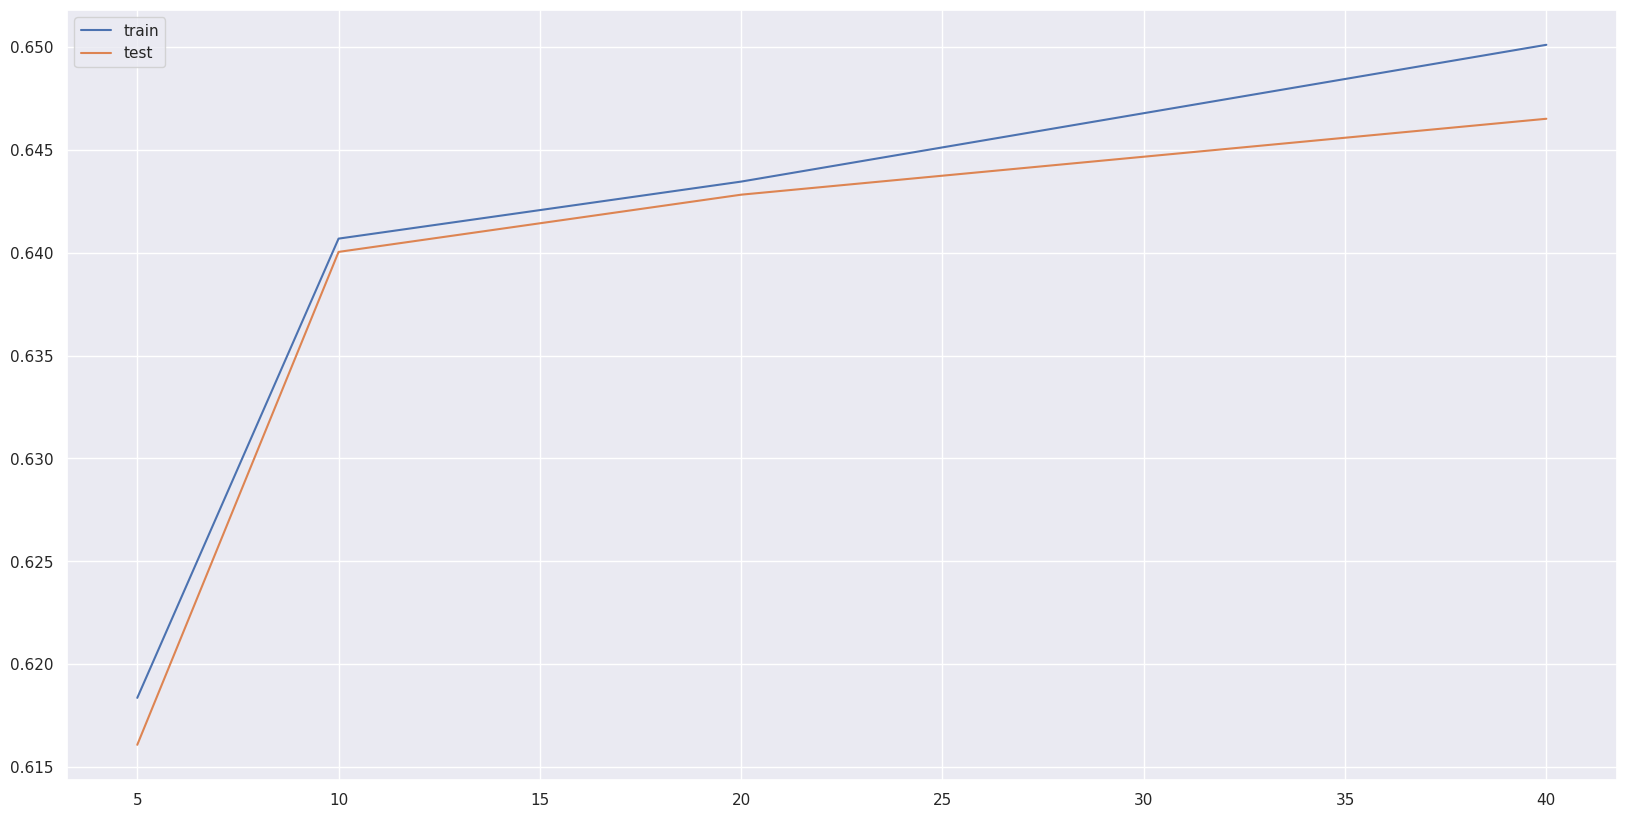

40

In [ ]:
# max_leaf_nodes
x = [5,10,20,40]
train = []
test = []

for val in x: # khởi tạo loop cho đã khởi tạo
    tree2 = DecisionTreeClassifier(random_state=42,
                                   max_features=23,
                                   max_depth=20,
                                   min_samples_leaf=20,
                                   criterion= 'gini',
                                   max_leaf_nodes=val)
    cv = cross_validate(tree2, x_train, y_train, return_train_score=True) # Đánh giá mô hình
    train.append(cv['train_score'].mean()) # Thêm kết quả training vào mảng train
    test.append(cv['test_score'].mean()) # Thêm kết quả test vào mảng test

sns.lineplot(x=x, y=train, label='train') # Vẽ đường thẳng hiển thị training
sns.lineplot(x=x, y=test, label='test') # Vẽ đường thẳng hiển thị test
plt.show()

x[np.argmax(test)] # Xuất giá trị tốt nhất

In [ ]:
dtc = DecisionTreeClassifier(criterion = 'gini', max_depth = 20, max_features= 23, min_samples_leaf = 20, max_leaf_nodes=40) # tổng hợp lại
dtc.fit(x_train, y_train) # training data

DecisionTreeClassifier(max_depth=20, max_features=23, max_leaf_nodes=40,
                       min_samples_leaf=20)

In [ ]:
y_pred = dtc.predict(x_test)

In [ ]:
# Danh gia mo hinh
scores = cross_val_score(dtc, x_test, y_test, cv=5) # dùng hàm cross_val_score đánh giá mô hình
tb_scores = np.mean(scores) # Xuất điểm 
print(tb_scores*100) # Xuất số điểm dự đoán

63.707742639040355


In [ ]:
accuracy = accuracy_score(y_test, y_pred) # dùng hàm accuracy_score đánh giá mô hình
print(accuracy*100) # Xuất điểm
print(classification_report(y_test, y_pred)) # dùng hàm classification_report đánh giá mô hình

65.03089785532534
              precision    recall  f1-score   support

           1       0.70      0.57      0.63      4029
           2       0.67      0.75      0.71      7331
           3       0.51      0.48      0.49      2395

    accuracy                           0.65     13755
   macro avg       0.62      0.60      0.61     13755
weighted avg       0.65      0.65      0.65     13755



## Random Forest

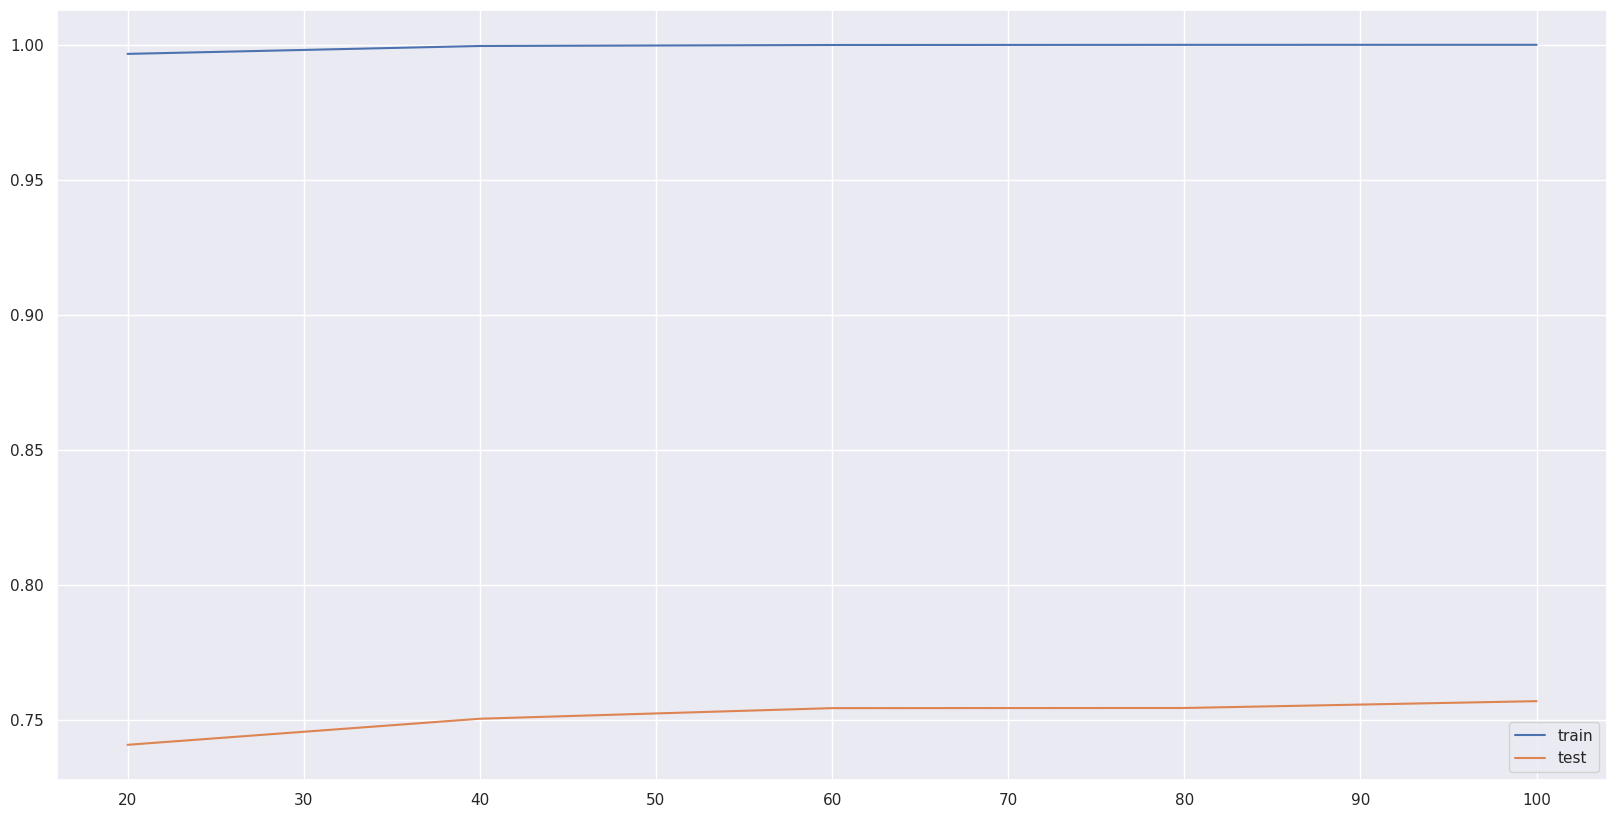

100

In [ ]:
# find n_estimators
x = [20,40,60,80,100]
train = []
test = []

for val in x: # khởi tạo loop cho đã khởi tạo
    rf2 = RandomForestClassifier(random_state=42,
                                 n_estimators=val)
    cv = cross_validate(rf2, x_train, y_train, return_train_score=True) # Đánh giá mô hình
    train.append(cv['train_score'].mean()) # Thêm kết quả training vào mảng train
    test.append(cv['test_score'].mean()) # Thêm kết quả test vào mảng test

sns.lineplot(x=x, y=train, label='train') # Vẽ đường thẳng hiển thị training
sns.lineplot(x=x, y=test, label='test') # Vẽ đường thẳng hiển thị test
plt.show()

x[np.argmax(test)] # Xuất giá trị tốt nhất

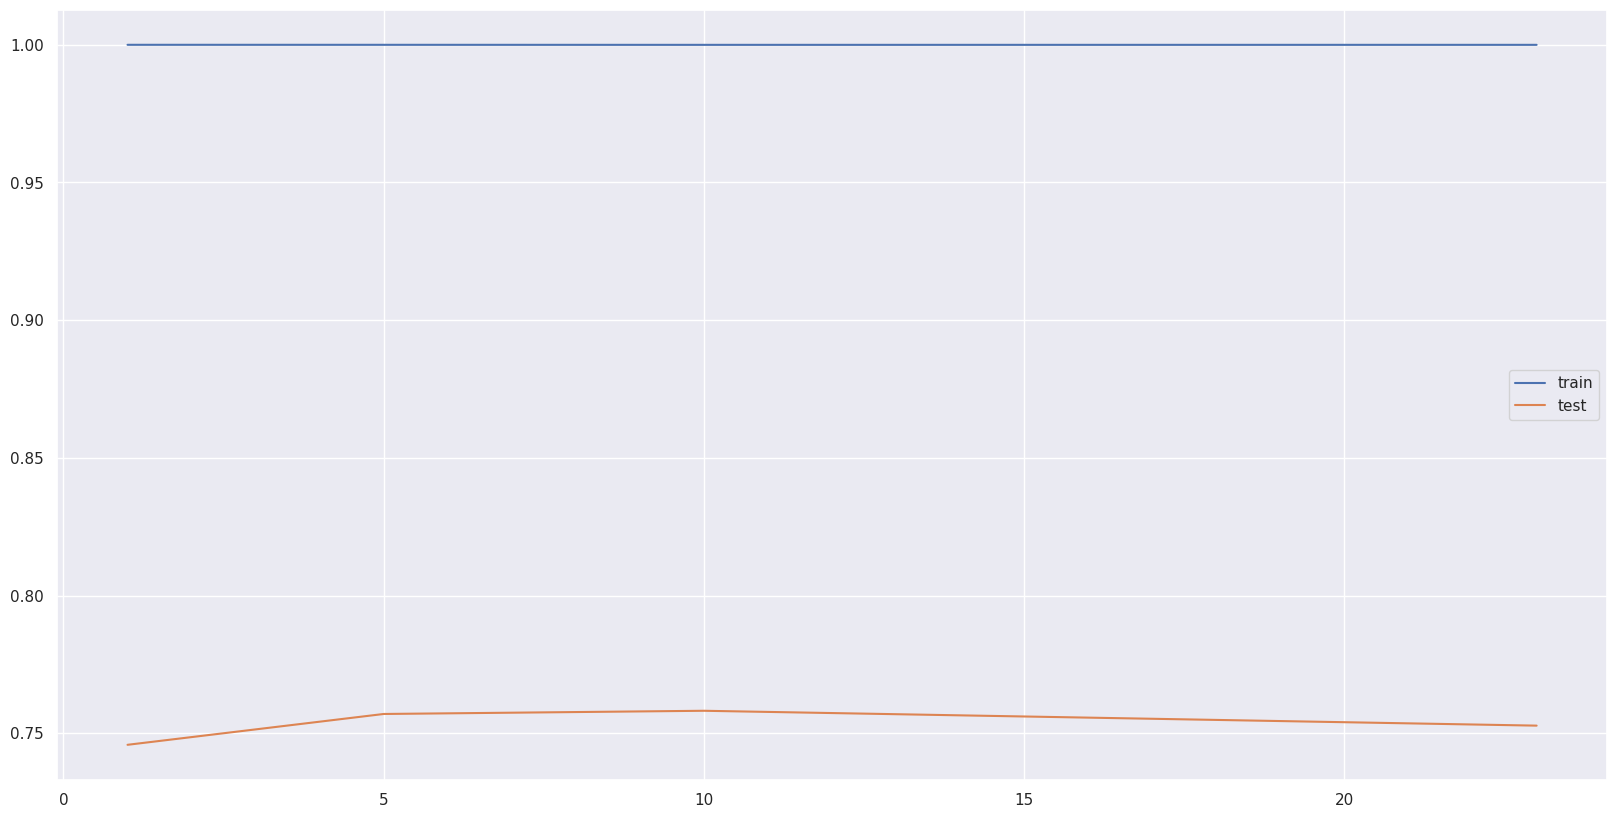

10

In [ ]:
# find max_features
x = [1,5,10,23]
train = []
test = []

for val in x: # khởi tạo loop cho đã khởi tạo
    rf2 = RandomForestClassifier(random_state=42,
                                 n_estimators=100,
                                 max_features=val)
    cv = cross_validate(rf2, x_train, y_train, return_train_score=True) # Đánh giá mô hình
    train.append(cv['train_score'].mean()) # Thêm kết quả training vào mảng train
    test.append(cv['test_score'].mean()) # Thêm kết quả test vào mảng test

sns.lineplot(x=x, y=train, label='train') # Vẽ đường thẳng hiển thị training
sns.lineplot(x=x, y=test, label='test') # Vẽ đường thẳng hiển thị test
plt.show()

x[np.argmax(test)] # Xuất giá trị tốt nhất

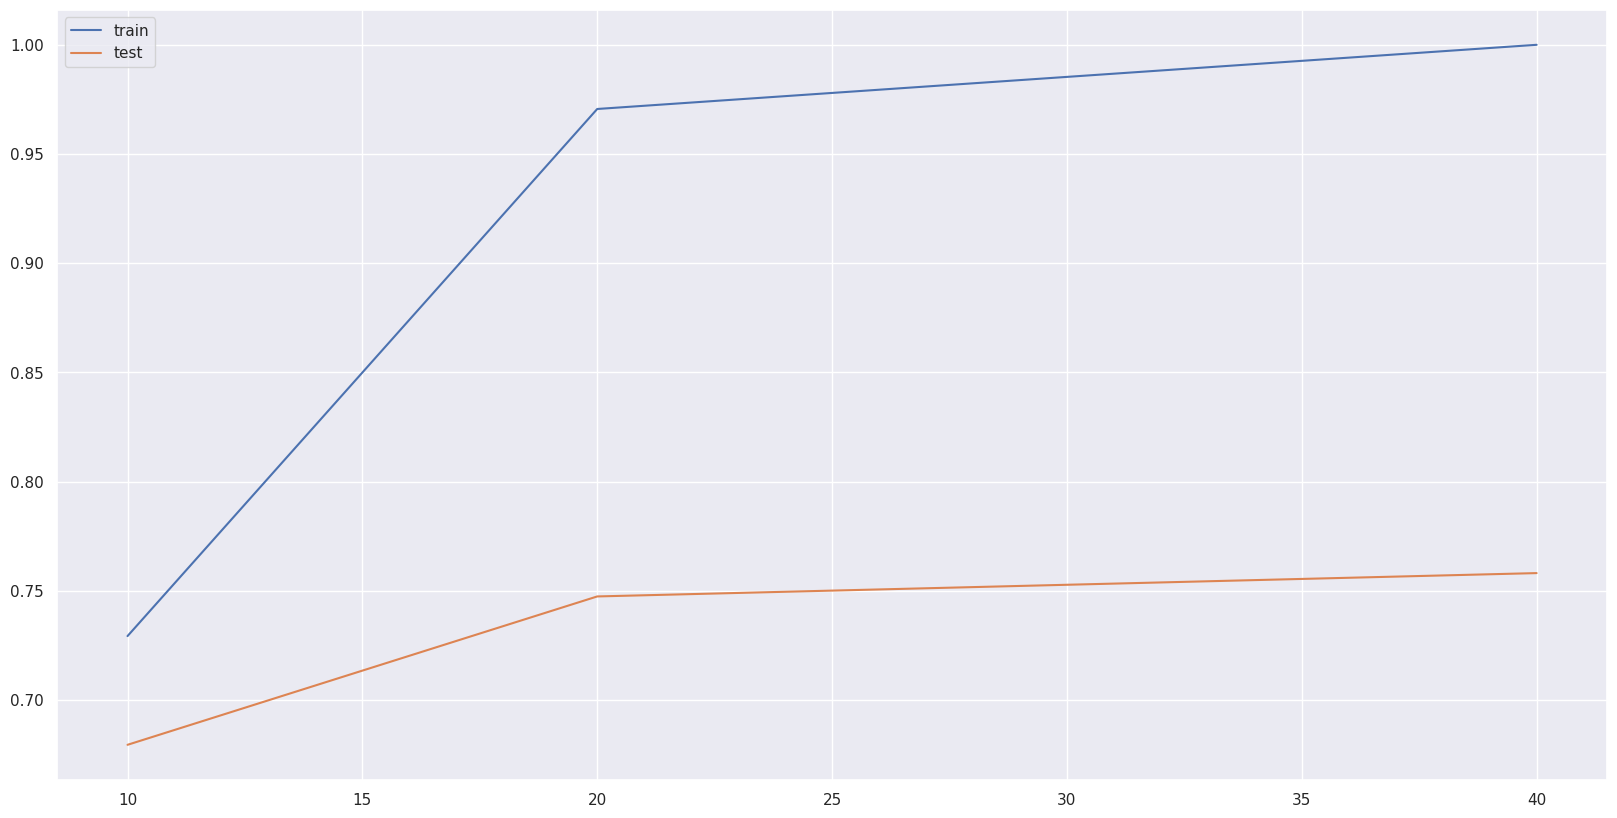

40

In [ ]:
# find max_depth
x = [10,20,40]
train = []
test = []

for val in x: # khởi tạo loop cho đã khởi tạo
    rf2 = RandomForestClassifier(random_state=42,
                                 n_estimators=100,
                                 max_features=10,
                                 max_depth=val)
    cv = cross_validate(rf2, x_train, y_train, return_train_score=True) # Đánh giá mô hình
    train.append(cv['train_score'].mean()) # Thêm kết quả training vào mảng train
    test.append(cv['test_score'].mean()) # Thêm kết quả test vào mảng test

sns.lineplot(x=x, y=train, label='train') # Vẽ đường thẳng hiển thị training
sns.lineplot(x=x, y=test, label='test') # Vẽ đường thẳng hiển thị test
plt.show()

x[np.argmax(test)] # Xuất giá trị tốt nhất

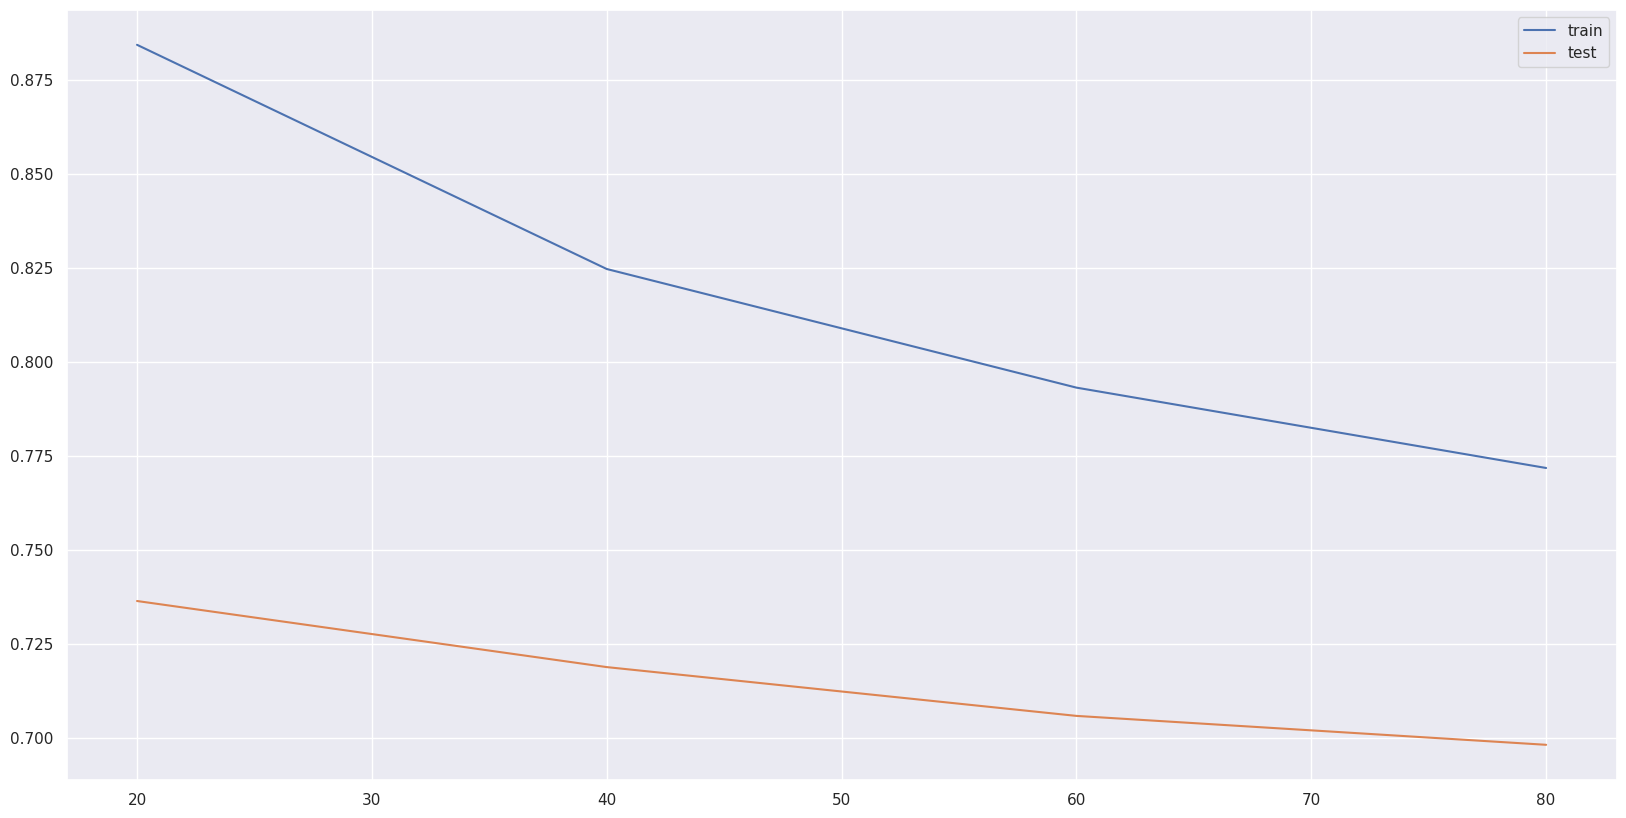

20

In [ ]:
# find min_samples_split
x = [20,40,60,80]
train = []
test = []

for val in x: # khởi tạo loop cho đã khởi tạo
    rf2 = RandomForestClassifier(random_state=42,
                                 n_estimators=100,
                                 max_features=10,
                                 max_depth=40,
                                 min_samples_split=val)
    cv = cross_validate(rf2, x_train, y_train, return_train_score=True) # Đánh giá mô hình
    train.append(cv['train_score'].mean()) # Thêm kết quả training vào mảng train
    test.append(cv['test_score'].mean()) # Thêm kết quả test vào mảng test

sns.lineplot(x=x, y=train, label='train') # Vẽ đường thẳng hiển thị training
sns.lineplot(x=x, y=test, label='test') # Vẽ đường thẳng hiển thị test
plt.show()

x[np.argmax(test)] # Xuất giá trị tốt nhất

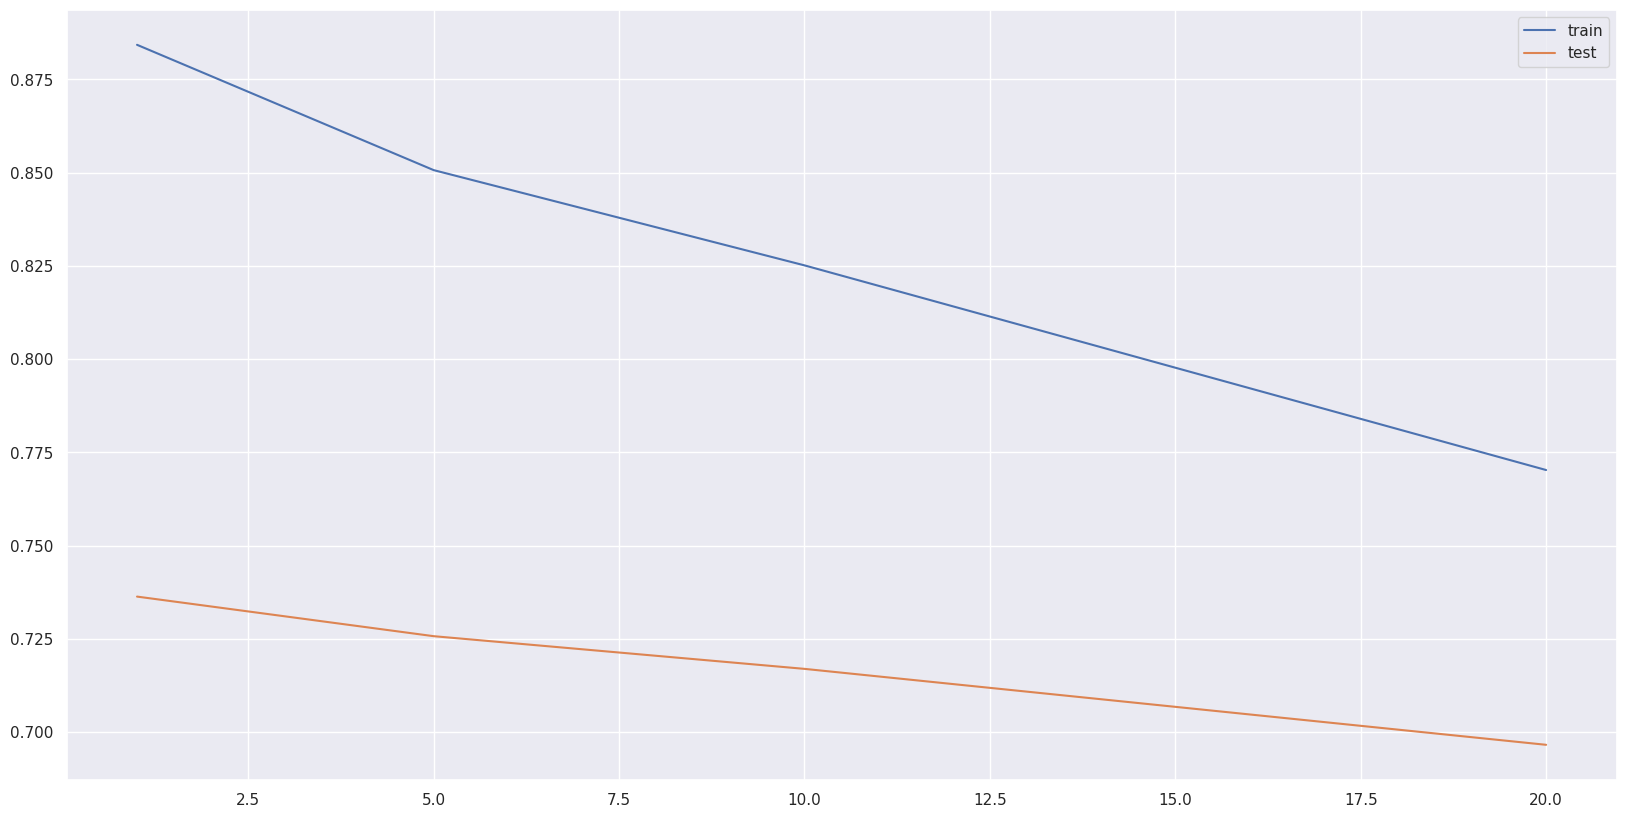

1

In [ ]:
# find min_samples_leaf
x = [1,5,10,20]
train = []
test = []

for val in x: # khởi tạo loop cho đã khởi tạo
    rf2 = RandomForestClassifier(random_state=42,
                                 n_estimators=100,
                                 max_features=10,
                                 max_depth=40,
                                 min_samples_split=20,
                                 min_samples_leaf=val)
    cv = cross_validate(rf2, x_train, y_train, return_train_score=True) # Đánh giá mô hình
    train.append(cv['train_score'].mean()) # Thêm kết quả training vào mảng train
    test.append(cv['test_score'].mean()) # Thêm kết quả test vào mảng test

sns.lineplot(x=x, y=train, label='train') # Vẽ đường thẳng hiển thị training
sns.lineplot(x=x, y=test, label='test') # Vẽ đường thẳng hiển thị test
plt.show()

x[np.argmax(test)] # Xuất giá trị tốt nhất

In [ ]:
rf = RandomForestClassifier(random_state=42,
                                 n_estimators=100,
                                 max_features=10,
                                 max_depth=40,
                                 min_samples_split=20,
                                 min_samples_leaf=1) # Tổng hợp lại
rf.fit(x_train, y_train) # training data

RandomForestClassifier(max_depth=40, max_features=10, min_samples_split=20,
                       random_state=42)

In [ ]:
y_pred = rf.predict(x_test) # Dự đoán cho tập dữ liệu test

In [ ]:
# Danh gia mo hinh
scores = cross_val_score(rf, x_test, y_test, cv=5) # dùng hàm cross_val_score để đánh giá mô hình với cv = 5
tb_scores = np.mean(scores) # Xuất điểm
print(tb_scores*100)

67.52453653217013


In [ ]:
accuracy = accuracy_score(y_test, y_pred) # dùng hàm accuracy_score đánh giá mô hình
print(accuracy*100) # Xuất điểm
print(classification_report(y_test, y_pred)) # dùng hàm classification_report đánh giá mô hình

75.45619774627409
              precision    recall  f1-score   support

           1       0.77      0.75      0.76      4029
           2       0.77      0.80      0.79      7331
           3       0.68      0.61      0.64      2395

    accuracy                           0.75     13755
   macro avg       0.74      0.72      0.73     13755
weighted avg       0.75      0.75      0.75     13755



In [ ]:
# from google.colab import files
# df_cp.to_csv('clean_data.csv', index=False)
# # tải file về máy tính
# files.download('clean_data.csv')